In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

scaler = MinMaxScaler()
robust_scaler = RobustScaler()
pt = PowerTransformer(method='yeo-johnson')

pd.set_option('display.max_columns', None)

In [3]:
life = pd.read_csv('life.csv')
life.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [5]:
life.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
life.isnull().sum()

,0
Country,0
Year,0
Status,0
Life_expectancy,10
Adult_Mortality,10
infant_deaths,0
Alcohol,194
percentage_expenditure,0
Hepatitis_B,553
Measles,0


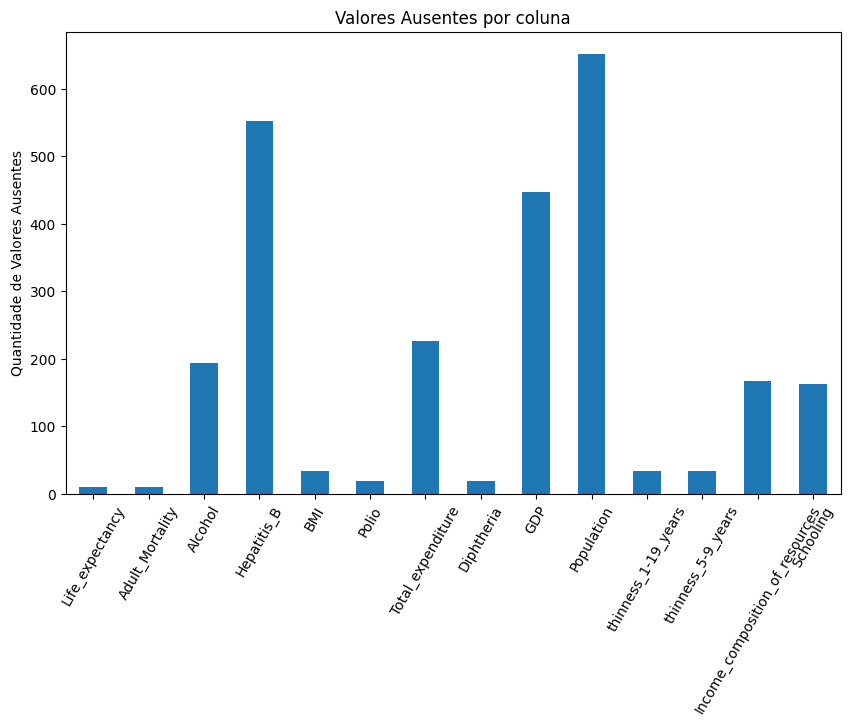

In [13]:
## Valores ausentes
plt.figure(figsize=(10,6))
life_ausente = life.loc[:, life.isnull().any()]
life_ausente.isnull().sum().plot(kind='bar')
plt.title('Valores Ausentes por coluna')
plt.ylabel('Quantidade de Valores Ausentes')
plt.xticks(rotation=60)
plt.show()

Durante o processo de análise exploratória e tratamento de dados, foi observado que o país South Sudan possuía registros incompletos e inconsistentes. Este país apresentava um número elevado de valores ausentes, além de múltiplos valores iguais a zero em variáveis que, conceitualmente, não deveriam assumir tal valor. Considerando que a amostra possui abrangência global e que a permanência de registros com baixa confiabilidade poderia comprometer a integridade estatística das análises, optou-se pela exclusão desse país.

In [ ]:
life = life[life['Country']!='South Sudan']

In [ ]:
life.loc[life['Life_expectancy'].isnull()]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [ ]:
print('Before 2013           | Developing Countries | LE mean: ', life.loc[(life['Year'] < 2013) & (life['Status']=='Developing'), 'Life_expectancy'].mean())
print('Before 2013           | Developing Countries | LE median: ', life.loc[(life['Year'] < 2013) & (life['Status']=='Developing'), 'Life_expectancy'].median())
print('Before 2013           | Developing Countries | LE mode: ', life.loc[(life['Year'] < 2013) & (life['Status']=='Developing'), 'Life_expectancy'].mode())
print('Between 2010 and 2012 | Developing Countries | LE mean: ', life.loc[(life['Year'] < 2013) & (life['Year'] >= 2010) & (life['Status']=='Developing'), 'Life_expectancy'].mean())
print('Between 2010 and 2012 | Developing Countries | LE median: ', life.loc[(life['Year'] < 2013) & (life['Year'] >= 2010) & (life['Status']=='Developing'), 'Life_expectancy'].median())
print('Between 2010 and 2012 | Developing Countries | LE mode: ', life.loc[(life['Year'] < 2013) & (life['Year'] >= 2010) & (life['Status']=='Developing'), 'Life_expectancy'].mode())
print('2013                  | Developing Countries | LE mean: ', life.loc[(life['Year']==2013) & (life['Status']=='Developing'), 'Life_expectancy'].mean())
print('2013                  | Developing Countries | LE median: ', life.loc[(life['Year']==2013) & (life['Status']=='Developing'), 'Life_expectancy'].median())
print('2013                  | Developing Countries | LE mode: ', life.loc[(life['Year']==2013) & (life['Status']=='Developing'), 'Life_expectancy'].mode())
print('All years             | Developing Countries | LE mean: ', life.loc[life['Status']=='Developing', 'Life_expectancy'].mean())
print('All years             | Developing Countries | LE median: ', life.loc[life['Status']=='Developing', 'Life_expectancy'].median())
print('All years             | Developing Countries | LE mode: ', life.loc[life['Status']=='Developing', 'Life_expectancy'].mode())

Before 2013           | Developing Countries | LE mean:  66.65497435897436
Before 2013           | Developing Countries | LE median:  68.6
Before 2013           | Developing Countries | LE mode:  0    73.0
Name: Life_expectancy, dtype: float64
Between 2010 and 2012 | Developing Countries | LE mean:  68.53
Between 2010 and 2012 | Developing Countries | LE median:  69.9
Between 2010 and 2012 | Developing Countries | LE mode:  0    74.5
1    74.9
2    75.0
Name: Life_expectancy, dtype: float64
2013                  | Developing Countries | LE mean:  69.32
2013                  | Developing Countries | LE median:  71.0
2013                  | Developing Countries | LE mode:  0    71.0
1    75.3
Name: Life_expectancy, dtype: float64
All years             | Developing Countries | LE mean:  67.19970833333333
All years             | Developing Countries | LE median:  69.1
All years             | Developing Countries | LE mode:  0    73.0
Name: Life_expectancy, dtype: float64


(array([  1.,   3.,   6.,  44.,  55.,  74., 100., 119., 176., 100., 184.,
        221., 208., 330., 475., 183.,  72.,  31.,  11.,   7.]),
 array([36.3  , 38.935, 41.57 , 44.205, 46.84 , 49.475, 52.11 , 54.745,
        57.38 , 60.015, 62.65 , 65.285, 67.92 , 70.555, 73.19 , 75.825,
        78.46 , 81.095, 83.73 , 86.365, 89.   ]),
 <BarContainer object of 20 artists>)

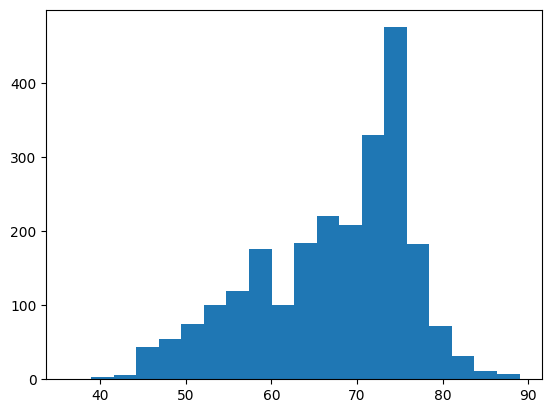

In [ ]:
plt.hist(life.loc[life['Status']=='Developing', 'Life_expectancy'], bins=20)

Para o tratamento de valores ausentes na variável Life_expectancy, verificou-se que os registros nulos estavam concentrados no ano de 2013 e em países classificados como em desenvolvimento. Considerando a distribuição dessa variável no subconjunto, optou-se pelo preenchimento por mediana, dado que essa medida central apresentou valor equivalente à moda (71,0) e próxima da média (69,32), o que indica uma distribuição relativamente simétrica. A mediana foi escolhida por sua robustez frente a possívei outliers, garantindo maior fidelidade ao comportamento real dos dados.

In [ ]:
life.loc[life['Life_expectancy'].isnull(), 'Life_expectancy'] = life.loc[(life['Year']==2013) & (life['Status']=='Developing'), 'Life_expectancy'].median()

(array([  1.,   3.,   6.,  44.,  55.,  74., 100., 119., 176., 100., 184.,
        221., 208., 340., 475., 183.,  72.,  31.,  11.,   7.]),
 array([36.3  , 38.935, 41.57 , 44.205, 46.84 , 49.475, 52.11 , 54.745,
        57.38 , 60.015, 62.65 , 65.285, 67.92 , 70.555, 73.19 , 75.825,
        78.46 , 81.095, 83.73 , 86.365, 89.   ]),
 <BarContainer object of 20 artists>)

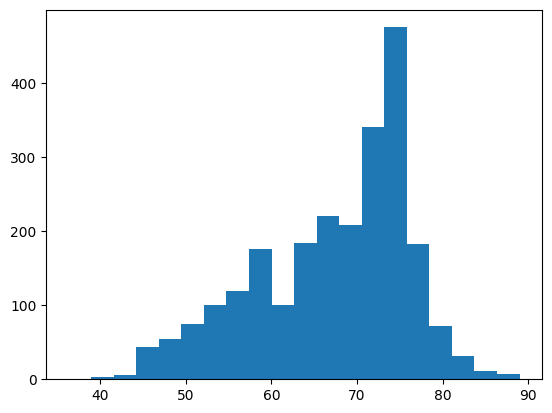

In [ ]:
plt.hist(life.loc[life['Status']=='Developing', 'Life_expectancy'], bins=20)

Adulto Mortality

In [ ]:
life.loc[life['Adult_Mortality'].isnull()]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,71.0,NaN,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,71.0,NaN,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,71.0,NaN,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,71.0,NaN,0,0.01,0.000000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,71.0,NaN,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,71.0,NaN,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,71.0,NaN,0,NaN,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,71.0,NaN,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,71.0,NaN,0,0.01,0.000000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,71.0,NaN,0,0.01,78.281203,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [ ]:
print('Before 2013           | Developing Countries | Adult_Mortality mean: ', life.loc[(life['Year'] < 2013) & (life['Status']=='Developing'), 'Adult_Mortality'].mean())
print('Before 2013           | Developing Countries | Adult_Mortality median: ', life.loc[(life['Year'] < 2013) & (life['Status']=='Developing'), 'Adult_Mortality'].median())
print('Before 2013           | Developing Countries | Adult_Mortality mode: ', life.loc[(life['Year'] < 2013) & (life['Status']=='Developing'), 'Adult_Mortality'].mode())
print('Between 2010 and 2012 | Developing Countries | Adult_Mortality mean: ', life.loc[(life['Year'] < 2013) & (life['Year'] >= 2010) & (life['Status']=='Developing'), 'Adult_Mortality'].mean())
print('Between 2010 and 2012 | Developing Countries | Adult_Mortality median: ', life.loc[(life['Year'] < 2013) & (life['Year'] >= 2010) & (life['Status']=='Developing'), 'Adult_Mortality'].median())
print('Between 2010 and 2012 | Developing Countries | Adult_Mortality mode: ', life.loc[(life['Year'] < 2013) & (life['Year'] >= 2010) & (life['Status']=='Developing'), 'Adult_Mortality'].mode())
print('2013                  | Developing Countries | Adult_Mortality mean: ', life.loc[(life['Year']==2013) & (life['Status']=='Developing'), 'Adult_Mortality'].mean())
print('2013                  | Developing Countries | Adult_Mortality median: ', life.loc[(life['Year']==2013) & (life['Status']=='Developing'), 'Adult_Mortality'].median())
print('2013                  | Developing Countries | Adult_Mortality mode: ', life.loc[(life['Year']==2013) & (life['Status']=='Developing'), 'Adult_Mortality'].mode())
print('All years             | Developing Countries | Adult_Mortality mean: ', life.loc[life['Status']=='Developing', 'Adult_Mortality'].mean())
print('All years             | Developing Countries | Adult_Mortality median: ', life.loc[life['Status']=='Developing', 'Adult_Mortality'].median())
print('All years             | Developing Countries | Adult_Mortality mode: ', life.loc[life['Status']=='Developing', 'Adult_Mortality'].mode())

Before 2013           | Developing Countries | Adult_Mortality mean:  185.49025641025642
Before 2013           | Developing Countries | Adult_Mortality median:  165.0
Before 2013           | Developing Countries | Adult_Mortality mode:  0    14.0
Name: Adult_Mortality, dtype: float64
Between 2010 and 2012 | Developing Countries | Adult_Mortality mean:  172.60666666666665
Between 2010 and 2012 | Developing Countries | Adult_Mortality median:  157.0
Between 2010 and 2012 | Developing Countries | Adult_Mortality mode:  0    138.0
Name: Adult_Mortality, dtype: float64
2013                  | Developing Countries | Adult_Mortality mean:  164.97333333333333
2013                  | Developing Countries | Adult_Mortality median:  155.0
2013                  | Developing Countries | Adult_Mortality mode:  0     12.0
1     23.0
2     84.0
3    163.0
4    172.0
5    192.0
Name: Adult_Mortality, dtype: float64
All years             | Developing Countries | Adult_Mortality mean:  181.74333333333334

(array([365., 101., 206., 365., 343., 219., 214., 201.,  77.,  93.,  69.,
         39.,  33.,  21.,  15.,   9.,  11.,   6.,   8.,   5.]),
 array([  1. ,  37.1,  73.2, 109.3, 145.4, 181.5, 217.6, 253.7, 289.8,
        325.9, 362. , 398.1, 434.2, 470.3, 506.4, 542.5, 578.6, 614.7,
        650.8, 686.9, 723. ]),
 <BarContainer object of 20 artists>)

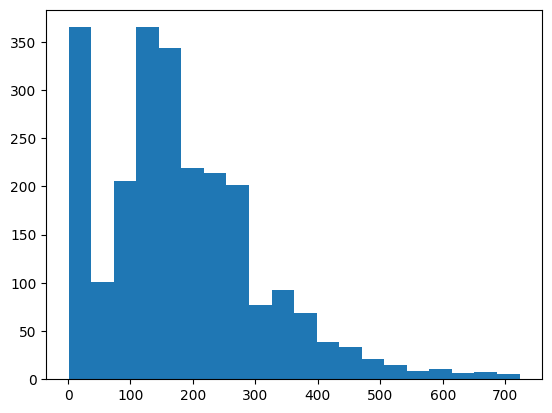

In [ ]:
plt.hist(life.loc[life['Status']=='Developing', 'Adult_Mortality'], bins=20)

A variável Adulto_Mortality apresentou distribuição assimétrica à direita, com predominância de valores baixos e uma cauda longa de valores altos. A análise identificou que os dados ausentes concentravam-se no ano de 2013 e em países em desenvolvimento. Considerando a assimetria da distribuição e a presença de multiplas modas pouco representativas, optou-se pelo preenchimento dos valores nulos com a mediana (155,0), por se tratar de uma medida de tendência central robusta, menos sensível a outliers e que representa adequademente o centro da distribuição.

In [ ]:
life.loc[life['Adult_Mortality'].isnull(), 'Adult_Mortality'] = life.loc[(life['Year']==2013) & (life['Status']=='Developing'), 'Adult_Mortality'].median()

(array([365., 101., 206., 365., 353., 219., 214., 201.,  77.,  93.,  69.,
         39.,  33.,  21.,  15.,   9.,  11.,   6.,   8.,   5.]),
 array([  1. ,  37.1,  73.2, 109.3, 145.4, 181.5, 217.6, 253.7, 289.8,
        325.9, 362. , 398.1, 434.2, 470.3, 506.4, 542.5, 578.6, 614.7,
        650.8, 686.9, 723. ]),
 <BarContainer object of 20 artists>)

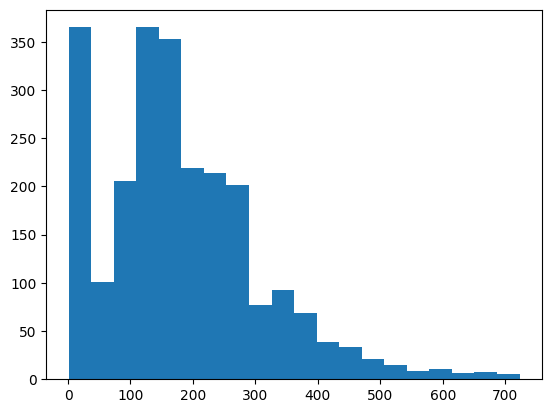

In [ ]:
plt.hist(life.loc[life['Status']=='Developing', 'Adult_Mortality'], bins=20)

Alcohol

In [ ]:
life.loc[(life['Alcohol'].isnull() & (life['Status']=='Developed'))]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.0,93.0,74,66.6,1,93.0,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
128,Austria,2015,Developed,81.5,65.0,0,NaN,0.0,93.0,309,57.6,0,93.0,NaN,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9
240,Belgium,2015,Developed,81.1,74.0,0,NaN,0.0,98.0,47,63.7,1,99.0,NaN,99.0,0.1,4356.875000,11274196.0,1.0,1.0,0.895,16.6
384,Bulgaria,2015,Developed,74.5,137.0,0,NaN,0.0,92.0,0,65.7,1,91.0,NaN,91.0,0.1,6993.477360,7177991.0,1.9,1.8,0.792,15.0
641,Croatia,2015,Developed,78.0,95.0,0,NaN,0.0,94.0,206,63.7,0,94.0,NaN,94.0,0.1,11579.667400,42364.0,1.5,1.4,0.823,15.3
673,Cyprus,2015,Developed,85.0,52.0,0,NaN,0.0,97.0,0,6.3,0,97.0,NaN,97.0,0.1,2375.112700,116985.0,1.0,1.0,0.854,14.3
689,Czechia,2015,Developed,78.8,86.0,0,NaN,0.0,97.0,9,66.1,0,97.0,NaN,97.0,0.1,NaN,NaN,1.8,1.8,NaN,NaN
737,Denmark,2015,Developed,86.0,71.0,0,NaN,0.0,NaN,9,58.8,0,93.0,NaN,93.0,0.1,5314.644160,5683483.0,1.1,0.9,0.923,19.2
994,Germany,2015,Developed,81.0,68.0,2,NaN,0.0,88.0,2464,62.3,3,94.0,NaN,95.0,0.1,41176.881580,81686611.0,1.1,1.1,0.924,17.1
1154,Hungary,2015,Developed,75.8,134.0,0,NaN,0.0,NaN,0,64.8,0,99.0,NaN,99.0,0.1,12365.626300,984328.0,1.6,1.6,0.834,15.6


In [ ]:
print('Before 2015           | Developing Countries | Alcohol mean: ', life.loc[(life['Year'] < 2015) & (life['Status']=='Developing'), 'Alcohol'].mean())
print('Before 2015           | Developing Countries | Alcohol median: ', life.loc[(life['Year'] < 2015) & (life['Status']=='Developing'), 'Alcohol'].median())
print('Before 2015           | Developing Countries | Alcohol mode: ', life.loc[(life['Year'] < 2015) & (life['Status']=='Developing'), 'Alcohol'].mode())
print('Between 2012 and 2014 | Developing Countries | Alcohol mean: ', life.loc[(life['Year'] < 2015) & (life['Year'] >= 2012) & (life['Status']=='Developing'), 'Alcohol'].mean())
print('Between 2012 and 2014 | Developing Countries | Alcohol median: ', life.loc[(life['Year'] < 2015) & (life['Year'] >= 2012) & (life['Status']=='Developing'), 'Alcohol'].median())
print('Between 2012 and 2014 | Developing Countries | Alcohol mode: ', life.loc[(life['Year'] < 2015) & (life['Year'] >= 2012) & (life['Status']=='Developing'), 'Alcohol'].mode())
print('2015                  | Developing Countries | Alcohol mean: ', life.loc[(life['Year']==2015) & (life['Status']=='Developing'), 'Alcohol'].mean())
print('2015                  | Developing Countries | Alcohol median: ', life.loc[(life['Year']==2015) & (life['Status']=='Developing'), 'Alcohol'].median())
print('2015                  | Developing Countries | Alcohol mode: ', life.loc[(life['Year']==2015) & (life['Status']=='Developing'), 'Alcohol'].mode())
print('All years             | Developing Countries | Alcohol mean: ', life.loc[life['Status']=='Developing', 'Alcohol'].mean())
print('All years             | Developing Countries | Alcohol median: ', life.loc[life['Status']=='Developing', 'Alcohol'].median())
print('All years             | Developing Countries | Alcohol mode: ', life.loc[life['Status']=='Developing', 'Alcohol'].mode())

Before 2015           | Developing Countries | Alcohol mean:  3.4851638618246237
Before 2015           | Developing Countries | Alcohol median:  2.56
Before 2015           | Developing Countries | Alcohol mode:  0    0.01
Name: Alcohol, dtype: float64
Between 2012 and 2014 | Developing Countries | Alcohol mean:  2.671546840958605
Between 2012 and 2014 | Developing Countries | Alcohol median:  0.51
Between 2012 and 2014 | Developing Countries | Alcohol mode:  0    0.01
Name: Alcohol, dtype: float64
2015                  | Developing Countries | Alcohol mean:  2.3049999999999997
2015                  | Developing Countries | Alcohol median:  2.3049999999999997
2015                  | Developing Countries | Alcohol mode:  0    0.01
1    4.60
Name: Alcohol, dtype: float64
All years             | Developing Countries | Alcohol mean:  3.484119469026549
All years             | Developing Countries | Alcohol median:  2.56
All years             | Developing Countries | Alcohol mode:  0    0.01


(array([685., 269., 201., 166., 199., 128., 128., 115., 104.,  90.,  67.,
         35.,  25.,  23.,   5.,   8.,   6.,   1.,   2.,   3.]),
 array([1.0000e-02, 9.0300e-01, 1.7960e+00, 2.6890e+00, 3.5820e+00,
        4.4750e+00, 5.3680e+00, 6.2610e+00, 7.1540e+00, 8.0470e+00,
        8.9400e+00, 9.8330e+00, 1.0726e+01, 1.1619e+01, 1.2512e+01,
        1.3405e+01, 1.4298e+01, 1.5191e+01, 1.6084e+01, 1.6977e+01,
        1.7870e+01]),
 <BarContainer object of 20 artists>)

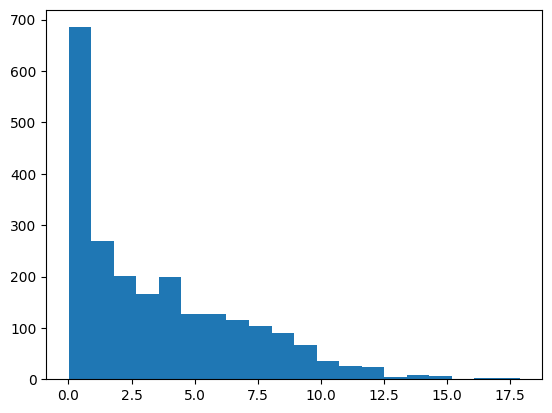

In [ ]:
plt.hist(life.loc[life['Status']=='Developing', 'Alcohol'], bins=20)

Durante o pré-processamento, considerou-se a possibilidade de exclusão da variável Alcohol, devido à sua distribuição altamente assimétrica e à concentração incomum de valores mínimos (0,01), que poderiam indicar falhas de medição ou preenchimento automático de dados. No entanto, decidiu-se pela manutenção da variável no conjunto de dados, visto que o consumo de álcool está diretamente associado a condições de saúde crônicas e mortalidade, sendo, portanto, potencialmente relevante para a modelagem da expectativa de vida. Para mitigar o impacto de possíveis distorções, adotou-se a estratégia de imputação baseada na mediana por ano. Para a imputação dos valores ausentes na variável Alcohol, adotou-se uma estratégia hierárquica baseada na mediana. Primeiramente, calculou-se a mediana do consumo de álcool por país, e esta foi utilizada para preencher os valores nulos correspondentes. Nos casos em que o país não apresentava registros válidos ao longo do período analisado, utilizou-se a mediana do respectivo ano como valor de imputação.

In [ ]:
countryStatus = ['Developing', 'Developed']
for status in countryStatus:
    countriesDeveloping = life.loc[(life['Alcohol'].isnull()) & (life['Status']==status), 'Country'].unique()
    for country in countriesDeveloping:
        countryRegisters = life.loc[life['Country']==country]
        if countryRegisters['Alcohol'].isnull().sum() == len(countryRegisters):
            for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
                life.loc[(life['Country']==country) & (life['Year']==i), 'Alcohol'] = life.loc[(life['Year']==i) & (life['Status']==status), 'Alcohol'].median()
        else:
            for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
                life.loc[(life['Country']==country) & (life['Alcohol'].isnull()) & (life['Year']==i), 'Alcohol'] = life.loc[(life['Country']==country), 'Alcohol'].median()

(array([724., 291., 214., 176., 214., 138., 137., 120., 113.,  95.,  73.,
         37.,  26.,  26.,   5.,   9.,   6.,   1.,   2.,   3.]),
 array([1.0000e-02, 9.0300e-01, 1.7960e+00, 2.6890e+00, 3.5820e+00,
        4.4750e+00, 5.3680e+00, 6.2610e+00, 7.1540e+00, 8.0470e+00,
        8.9400e+00, 9.8330e+00, 1.0726e+01, 1.1619e+01, 1.2512e+01,
        1.3405e+01, 1.4298e+01, 1.5191e+01, 1.6084e+01, 1.6977e+01,
        1.7870e+01]),
 <BarContainer object of 20 artists>)

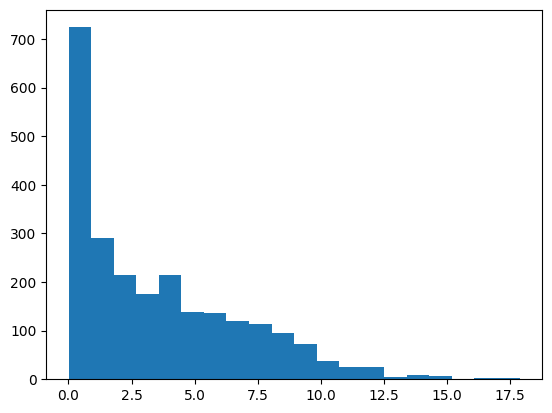

In [ ]:
plt.hist(life.loc[life['Status']=='Developing', 'Alcohol'], bins=20)

Hepatitis_B

In [ ]:
print("Número de países desenvolvidos sem registro de Hepatite B: ", life.loc[(life['Hepatitis_B'].isnull()) & (life['Status']=='Developed'), 'Country'].nunique())
print("Número de países desenvolvidos sem registro de Hepatite B: ", life.loc[(life['Hepatitis_B'].isnull()) & (life['Status']=='Developing'), 'Country'].nunique())

Número de países desenvolvidos sem registro de Hepatite B:  15
Número de países desenvolvidos sem registro de Hepatite B:  82


In [ ]:
print("Developed countries Hepatitis_B Mean: ", life.loc[life['Status']=='Developed','Hepatitis_B'].mean())
print("Developed countries Hepatitis_B Median: ", life.loc[life['Status']=='Developed','Hepatitis_B'].median())
print("Developed countries Hepatitis_B Mode: ", life.loc[life['Status']=='Developed','Hepatitis_B'].mode())
print("Developing countries Hepatitis_B Mean: ", life.loc[life['Status']=='Developing','Hepatitis_B'].mean())
print("Developing countries Hepatitis_B Median: ", life.loc[life['Status']=='Developing','Hepatitis_B'].median())
print("Developing countries Hepatitis_B Mode: ", life.loc[life['Status']=='Developing','Hepatitis_B'].mode())

Developed countries Hepatitis_B Mean:  88.04129793510324
Developed countries Hepatitis_B Median:  95.0
Developed countries Hepatitis_B Mode:  0    96.0
Name: Hepatitis_B, dtype: float64
Developing countries Hepatitis_B Mean:  79.78777506112469
Developing countries Hepatitis_B Median:  91.0
Developing countries Hepatitis_B Mode:  0    99.0
Name: Hepatitis_B, dtype: float64


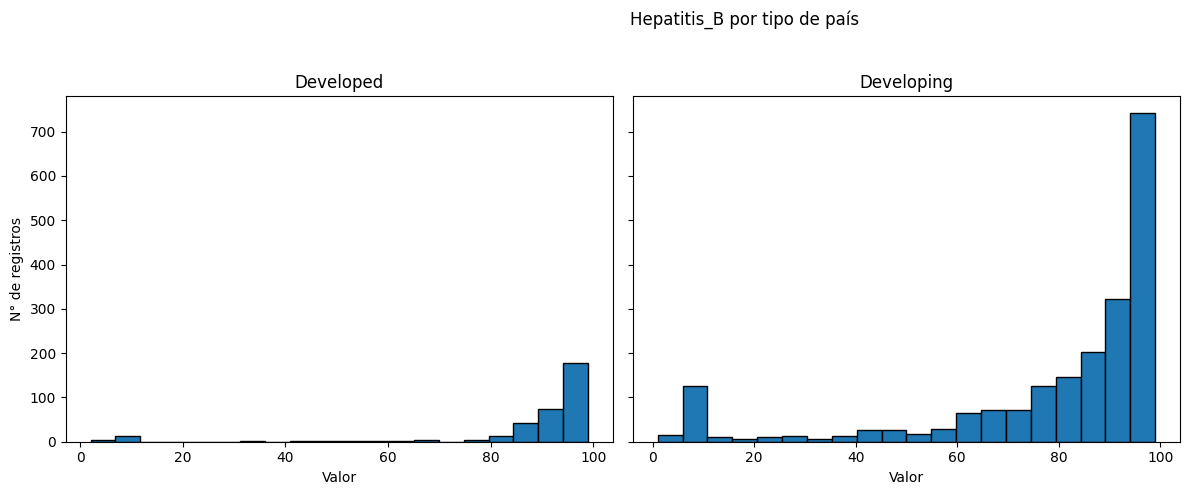

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

classes = ['Developed', 'Developing']

for i, c in enumerate(classes):
    registers = life[life['Status'] == c]['Hepatitis_B'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Hepatitis_B por tipo de país')
plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

In [ ]:
life.groupby(['Year', 'Status'])['Hepatitis_B'].mean()

Year  Status    
2000  Developed     71.470588
      Developing    74.676471
2001  Developed     75.500000
      Developing    73.597403
2002  Developed     86.578947
      Developing    74.489362
2003  Developed     87.200000
      Developing    71.738739
2004  Developed     91.900000
      Developing    75.627119
2005  Developed     89.050000
      Developing    79.629921
2006  Developed     93.850000
      Developing    80.068702
2007  Developed     93.333333
      Developing    79.797101
2008  Developed     90.476190
      Developing    82.633803
2009  Developed     94.238095
      Developing    82.834483
2010  Developed     87.818182
      Developing    79.664384
2011  Developed     88.291667
      Developing    83.342466
2012  Developed     82.375000
      Developing    82.678082
2013  Developed     91.916667
      Developing    81.816456
2014  Developed     90.000000
      Developing    82.006711
2015  Developed     89.750000
      Developing    81.590604
Name: Hepatitis_B, dtype: float64

Devido a ambos os tipos de países possuírem uma assimetria a esquerda nos histogramas(isto significa que: Moda > Mediana > Média), será utilizado a mediana dos valores de Hepatitis_B, pois está mais próxima da moda e da concentração dos dados, já que a média, nesse caso, subestima os valores reais.

In [ ]:
countriesDeveloped = life.loc[(life['Hepatitis_B'].isnull()) & (life['Status']=='Developed'), 'Country'].unique()
for country in countriesDeveloped:
    countryRegisters = life.loc[life['Country']==country]
    if countryRegisters['Hepatitis_B'].isnull().sum() == len(countryRegisters):
        for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
            life.loc[(life['Country']==country) & (life['Year']==i), 'Hepatitis_B'] = life.loc[(life['Year']==i) & (life['Status']=='Developed'), 'Hepatitis_B'].median()
    else:
        for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
            life.loc[(life['Country']==country) & (life['Hepatitis_B'].isnull()) & (life['Year']==i), 'Hepatitis_B'] = life.loc[(life['Country']==country), 'Hepatitis_B'].median()

In [ ]:
countriesDeveloping = life.loc[(life['Hepatitis_B'].isnull()) & (life['Status']=='Developing'), 'Country'].unique()
for country in countriesDeveloping:
    countryRegisters = life.loc[life['Country']==country]
    if countryRegisters['Hepatitis_B'].isnull().sum() == len(countryRegisters):
        for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
            life.loc[(life['Country']==country) & (life['Year']==i), 'Hepatitis_B'] = life.loc[(life['Year']==i) & (life['Status']=='Developing'), 'Hepatitis_B'].median()
    else:
        for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
            life.loc[(life['Country']==country) & (life['Hepatitis_B'].isnull()) & (life['Year']==i), 'Hepatitis_B'] = life.loc[(life['Country']==country), 'Hepatitis_B'].median()

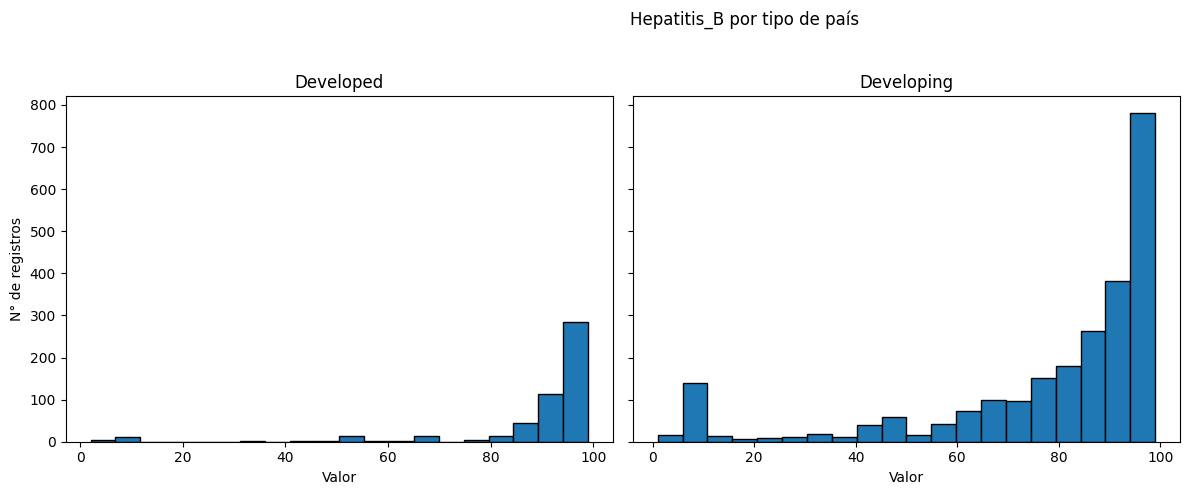

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

classes = ['Developed', 'Developing']

for i, c in enumerate(classes):
    registers = life[life['Status'] == c]['Hepatitis_B'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Hepatitis_B por tipo de país')
plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

BMI

In [ ]:
life.loc[life['BMI'].isnull()]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
1715,Monaco,2013,Developing,71.0,155.0,0,0.01,0.000000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2216,San Marino,2013,Developing,71.0,155.0,0,0.01,0.000000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2457,Sudan,2015,Developing,64.1,225.0,58,1.76,0.000000,93.0,3585,NaN,85,93.0,NaN,93.0,0.3,2513.884661,3864783.0,NaN,NaN,0.488,7.2
2458,Sudan,2014,Developing,63.8,229.0,59,0.01,253.608651,94.0,676,NaN,86,94.0,8.43,94.0,0.3,2176.898290,37737913.0,NaN,NaN,0.485,7.2
2459,Sudan,2013,Developing,63.5,232.0,60,0.01,227.835321,93.0,2813,NaN,88,93.0,8.42,93.0,0.3,1955.667990,36849918.0,NaN,NaN,0.478,7.0
2460,Sudan,2012,Developing,63.2,235.0,61,0.01,220.522192,92.0,8523,NaN,89,92.0,8.20,92.0,0.3,1892.894352,3599192.0,NaN,NaN,0.468,6.8
2461,Sudan,2011,Developing,62.7,241.0,61,2.12,196.689215,93.0,5616,NaN,91,93.0,8.30,93.0,0.3,1666.857757,35167314.0,NaN,NaN,0.463,7.0
2462,Sudan,2010,Developing,62.5,243.0,62,1.77,172.009788,75.0,680,NaN,92,9.0,7.97,9.0,0.3,1476.478870,34385963.0,NaN,NaN,0.461,7.0
2463,Sudan,2009,Developing,62.0,248.0,63,1.99,17.053693,72.0,68,NaN,94,81.0,8.40,81.0,0.3,1226.884381,3365619.0,NaN,NaN,0.456,6.8
2464,Sudan,2008,Developing,61.8,251.0,64,2.01,128.636271,78.0,129,NaN,95,85.0,8.17,86.0,0.3,1291.528826,32955496.0,NaN,NaN,0.444,6.3


In [ ]:
print("Developing Countries BMI Mean: ", life.loc[life['Status']=='Developing','BMI'].mean())
print("Developing Countries BMI Median: ", life.loc[life['Status']=='Developing','BMI'].median())
print("Developing Countries BMI Mode: ", life.loc[life['Status']=='Developing','BMI'].mode())

Developing Countries BMI Mean:  35.435326086956515
Developing Countries BMI Median:  35.2
Developing Countries BMI Mode:  0     2.7
1    58.5
Name: BMI, dtype: float64


(array([149.,  83.,  80., 281., 226., 187., 105.,  90.,  93., 103., 209.,
        166., 251., 173., 116.,  45.,  19.,  11.,   3.,   2.]),
 array([ 1.   ,  5.315,  9.63 , 13.945, 18.26 , 22.575, 26.89 , 31.205,
        35.52 , 39.835, 44.15 , 48.465, 52.78 , 57.095, 61.41 , 65.725,
        70.04 , 74.355, 78.67 , 82.985, 87.3  ]),
 <BarContainer object of 20 artists>)

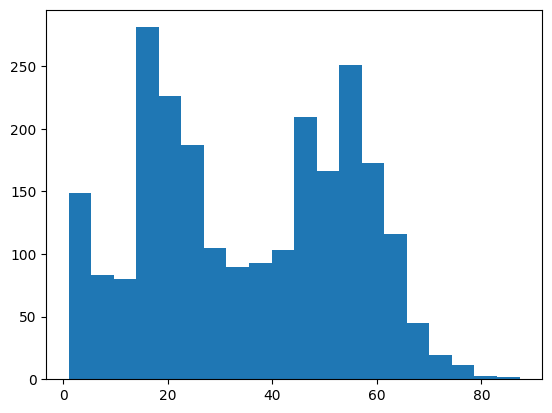

In [ ]:
plt.hist(life.loc[life['Status']=='Developing','BMI'], bins=20)

O BMI apresentou uma distribuição multimodal, com dois picos principais(2.7 e 58.5). Então, optou-se por realizar o preenchimento dos valores utilizando a mediana global dos países em desenvolvimento para cada ano.

In [ ]:
countriesDeveloping = life.loc[(life['BMI'].isnull()) & (life['Status']=='Developing'), 'Country'].unique()
for country in countriesDeveloping:
    countryRegisters = life.loc[life['Country']==country]
    for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
        life.loc[(life['Country']==country) & (life['Year']==i), 'BMI'] = life.loc[(life['Year']==i) & (life['Status']=='Developing'), 'BMI'].median()

(array([149.,  83.,  80., 281., 226., 187., 106.,  98.,  99., 103., 212.,
        166., 251., 173., 116.,  45.,  19.,  11.,   3.,   2.]),
 array([ 1.   ,  5.315,  9.63 , 13.945, 18.26 , 22.575, 26.89 , 31.205,
        35.52 , 39.835, 44.15 , 48.465, 52.78 , 57.095, 61.41 , 65.725,
        70.04 , 74.355, 78.67 , 82.985, 87.3  ]),
 <BarContainer object of 20 artists>)

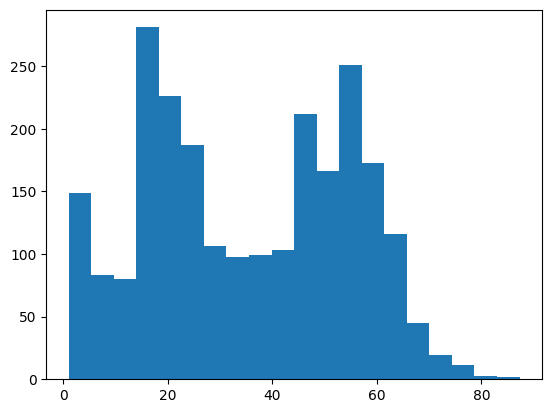

In [ ]:
plt.hist(life.loc[life['Status']=='Developing','BMI'], bins=20)

Polio

In [ ]:
life.loc[life['Polio'].isnull()]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
1742,Montenegro,2005,Developing,73.6,133.0,0,0.01,527.307672,45.5,0,55.7,0,NaN,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,45.5,0,55.0,0,NaN,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,45.5,0,54.2,0,NaN,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,45.5,0,53.5,0,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,45.5,0,52.7,0,NaN,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,45.5,0,51.9,0,NaN,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2615,Timor-Leste,2001,Developing,59.4,269.0,3,0.50,6.556583,76.5,0,12.3,4,NaN,3.75,NaN,0.1,56.424987,892531.0,12.1,12.2,0.470,9.8
2616,Timor-Leste,2000,Developing,58.7,276.0,3,0.50,49.069672,76.5,0,11.9,4,NaN,3.26,NaN,0.1,422.286330,87167.0,12.2,12.2,0.000,0.0


(array([ 60., 104.,   1.,   0.,   6.,   4.,   9.,  16.,  42.,  27.,  43.,
         42.,  67.,  82., 107., 159., 152., 257., 334., 890.]),
 array([ 3. ,  7.8, 12.6, 17.4, 22.2, 27. , 31.8, 36.6, 41.4, 46.2, 51. ,
        55.8, 60.6, 65.4, 70.2, 75. , 79.8, 84.6, 89.4, 94.2, 99. ]),
 <BarContainer object of 20 artists>)

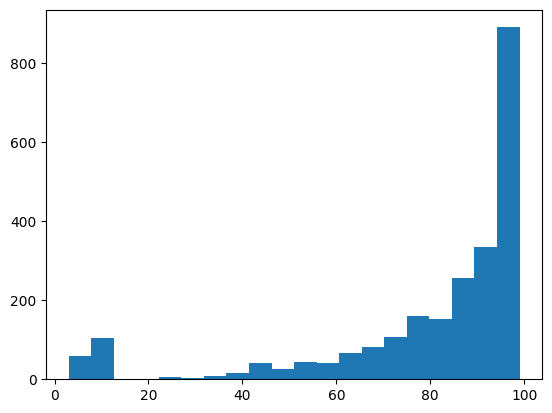

In [ ]:
plt.hist(life.loc[life['Status']=='Developing','Polio'], bins=20)

In [ ]:
print("Developing Countries Polio Mean: ", life.loc[life['Status']=='Developing','Polio'].mean())
print("Developing Countries Polio Median: ", life.loc[life['Status']=='Developing','Polio'].median())
print("Developing Countries Polio Mode: ", life.loc[life['Status']=='Developing','Polio'].mode())

Developing Countries Polio Mean:  80.24604496253123
Developing Countries Polio Median:  91.0
Developing Countries Polio Mode:  0    99.0
Name: Polio, dtype: float64


A variável Polio apresentou uma distribuição assimétrica a esquerda, com a maioria dos registros concentrados em valores elevados. Enquanto a média e moda apresentaram valores altos, 99 e 91 respectivamente, a média foi significativamente inferior (80.17), indicando a presença de valores extremos baixos. Diante disso, optou-se pela imputação com a mediana, pois esta representa a melhor centralidade dos dados. Os países tiveram seus dados ausentes preenchidos com a própia mediana.

In [ ]:
countriesDeveloping = life.loc[(life['Polio'].isnull()) & (life['Status']=='Developing'), 'Country'].unique()
for country in countriesDeveloping:
    countryRegisters = life.loc[life['Country']==country]
    for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
        life.loc[(life['Country']==country) & (life['Polio'].isnull()) & (life['Year']==i), 'Polio'] = life.loc[(life['Country']==country), 'Polio'].median()

(array([ 60., 104.,   1.,   0.,   6.,   4.,   9.,  16.,  42.,  27.,  43.,
         42.,  67.,  84., 107., 159., 152., 257., 340., 890.]),
 array([ 3. ,  7.8, 12.6, 17.4, 22.2, 27. , 31.8, 36.6, 41.4, 46.2, 51. ,
        55.8, 60.6, 65.4, 70.2, 75. , 79.8, 84.6, 89.4, 94.2, 99. ]),
 <BarContainer object of 20 artists>)

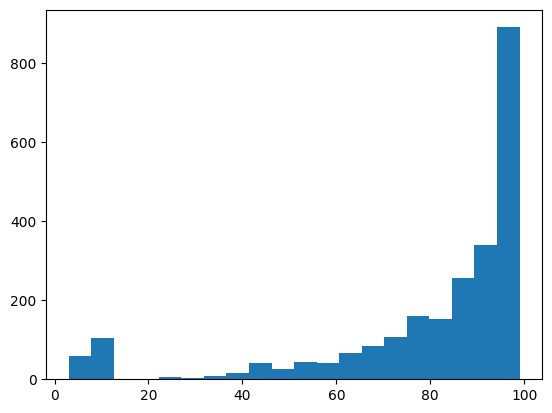

In [ ]:
plt.hist(life.loc[life['Status']=='Developing','Polio'], bins=20)

Total_expenditure

In [ ]:
life.loc[(life['Status']=='Developing') & (life['Total_expenditure'].isnull())]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,0.45,0.0,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,6.35,0.0,64.0,118,23.3,98,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,7.84,0.0,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,7.93,0.0,94.0,0,62.8,9,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,3.91,0.0,94.0,33,54.9,1,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,7.55,0.0,87.0,0,62.1,10,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,3.01,0.0,97.0,256,17.5,35,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,0.04,0.0,69.0,468,41.3,47,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,2.41,0.0,9.0,9,23.4,40,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [ ]:
print("Developed countries Total_expenditure Mean: ", life.loc[life['Status']=='Developed','Total_expenditure'].mean())
print("Developed countries Total_expenditure Median: ", life.loc[life['Status']=='Developed','Total_expenditure'].median())
print("Developed countries Total_expenditure Mode: ", life.loc[life['Status']=='Developed','Total_expenditure'].mode())
print("Developing countries Total_expenditure Mean: ", life.loc[life['Status']=='Developing','Total_expenditure'].mean())
print("Developing countries Total_expenditure Median: ", life.loc[life['Status']=='Developing','Total_expenditure'].median())
print("Developing countries Total_expenditure Mode: ", life.loc[life['Status']=='Developing','Total_expenditure'].mode())

Developed countries Total_expenditure Mean:  7.5540416666666665
Developed countries Total_expenditure Median:  7.895
Developed countries Total_expenditure Mode:  0    1.70
1    7.40
2    7.80
3    8.18
4    8.80
5    9.36
6    9.60
Name: Total_expenditure, dtype: float64
Developing countries Total_expenditure Mean:  5.594571556751906
Developing countries Total_expenditure Median:  5.4
Developing countries Total_expenditure Mode:  0    4.6
Name: Total_expenditure, dtype: float64


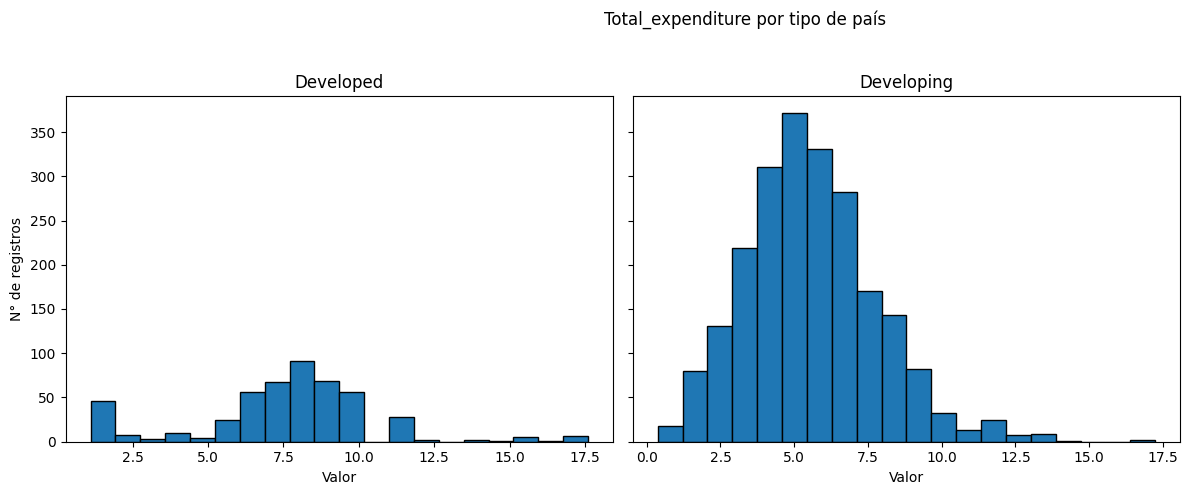

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

classes = ['Developed', 'Developing']

for i, c in enumerate(classes):
    registers = life[life['Status'] == c]['Total_expenditure'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Total_expenditure por tipo de país')
plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

Os valore ausentes da coluna Total_expenditure, para países desenvolvidos, estavam concentrados exclusivamente no ano de 2015. Dessa forma, foi possível aplicar uma estratégia de preenchimento baseada no histórico dos própios países. O valor do ano de 2015 foi imputado com a mediana do país.

In [ ]:
countriesDeveloped = life.loc[(life['Total_expenditure'].isnull()) & (life['Status']=='Developed'), 'Country'].unique()
for country in countriesDeveloped:
    life.loc[(life['Country']==country) & (life['Year']==2015), 'Total_expenditure'] = life.loc[(life['Country']==country), 'Total_expenditure'].median()

Para o tratamento dos valores em países em desenvolvimento, foi adotada uma abordagem condicional com base na disponibilidade de dados históricos. Para os países que não possuíam nenhum valor preenchido em todos os seus registros, foi aplicada a mediana anual da variável considerando todos os países em desenvolvimento no respectivo ano. Já para os países que possuíam ao menos um valor válido, os valores ausentes foram preenchidos utilizando a mediana de todos os registros disponíveis naquele país.

In [ ]:
countriesDeveloping = life.loc[(life['Total_expenditure'].isnull()) & (life['Status']=='Developing'), 'Country'].unique()
for country in countriesDeveloping:
    countryRegisters = life.loc[life['Country']==country]
    if countryRegisters['Total_expenditure'].isnull().sum() == len(countryRegisters):
        for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
            life.loc[(life['Country']==country) & (life['Year']==i), 'Total_expenditure'] = life.loc[(life['Year']==i) & (life['Status']=='Developing'), 'Total_expenditure'].median()
    else:
        for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
            life.loc[(life['Country']==country) & (life['Total_expenditure'].isnull()) & (life['Year']==i), 'Total_expenditure'] = life.loc[(life['Country']==country), 'Total_expenditure'].median()

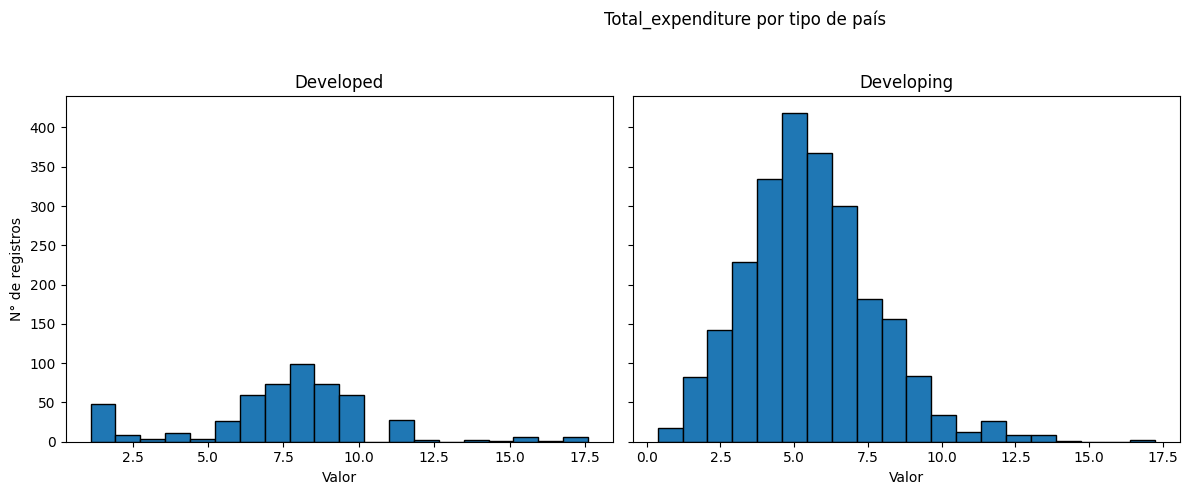

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

classes = ['Developed', 'Developing']

for i, c in enumerate(classes):
    registers = life[life['Status'] == c]['Total_expenditure'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Total_expenditure por tipo de país')
plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

Diphteria

In [ ]:
life.loc[life['Diphtheria'].isnull()]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
1742,Montenegro,2005,Developing,73.6,133.0,0,0.01,527.307672,45.5,0,55.7,0,92.5,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,45.5,0,55.0,0,92.5,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,45.5,0,54.2,0,92.5,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,45.5,0,53.5,0,92.5,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,45.5,0,52.7,0,92.5,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,45.5,0,51.9,0,92.5,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2615,Timor-Leste,2001,Developing,59.4,269.0,3,0.50,6.556583,76.5,0,12.3,4,69.0,3.75,NaN,0.1,56.424987,892531.0,12.1,12.2,0.470,9.8
2616,Timor-Leste,2000,Developing,58.7,276.0,3,0.50,49.069672,76.5,0,11.9,4,69.0,3.26,NaN,0.1,422.286330,87167.0,12.2,12.2,0.000,0.0


In [ ]:
print("Developing countries Diphtheria Mean: ", life.loc[life['Status']=='Developing','Diphtheria'].mean())
print("Developing countries Diphtheria Median: ", life.loc[life['Status']=='Developing','Diphtheria'].median())
print("Developing countries Diphtheria Mode: ", life.loc[life['Status']=='Developing','Diphtheria'].mode())

Developing countries Diphtheria Mean:  80.02039966694421
Developing countries Diphtheria Median:  91.0
Developing countries Diphtheria Mode:  0    99.0
Name: Diphtheria, dtype: float64


(array([ 43., 117.,   1.,   2.,  13.,   8.,  14.,  20.,  44.,  23.,  33.,
         25.,  85.,  64., 104., 164., 163., 274., 338., 867.]),
 array([ 2.  ,  6.85, 11.7 , 16.55, 21.4 , 26.25, 31.1 , 35.95, 40.8 ,
        45.65, 50.5 , 55.35, 60.2 , 65.05, 69.9 , 74.75, 79.6 , 84.45,
        89.3 , 94.15, 99.  ]),
 <BarContainer object of 20 artists>)

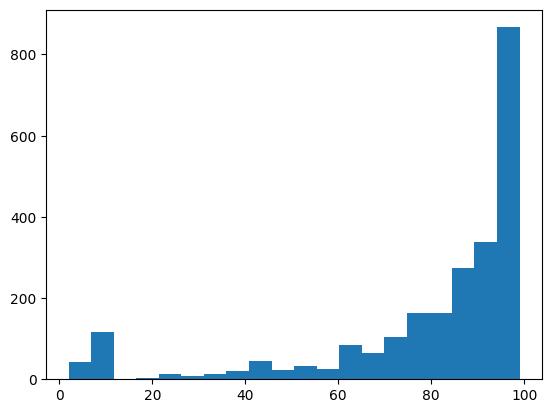

In [ ]:
plt.hist(life.loc[life['Status']=='Developing','Diphtheria'], bins=20)

Durante a análise da variável Diphtheria, identificou-se que os valores ausentes estavam restritos a países em desenvolvimento. Como a maioria desses países possuía uma quantidade significativa de dados válidos, optou-se por preencher os valores nulos utilizando a mediana da própria variável por país.

In [ ]:
countriesDeveloping = life.loc[(life['Diphtheria'].isnull()), 'Country'].unique()
for country in countriesDeveloping:
    life.loc[(life['Country']==country) & (life['Diphtheria'].isnull()), 'Diphtheria'] = life.loc[(life['Country']==country), 'Diphtheria'].median()

(array([ 43., 117.,   1.,   2.,  13.,   8.,  14.,  20.,  44.,  23.,  33.,
         25.,  85.,  66., 104., 164., 163., 274., 344., 867.]),
 array([ 2.  ,  6.85, 11.7 , 16.55, 21.4 , 26.25, 31.1 , 35.95, 40.8 ,
        45.65, 50.5 , 55.35, 60.2 , 65.05, 69.9 , 74.75, 79.6 , 84.45,
        89.3 , 94.15, 99.  ]),
 <BarContainer object of 20 artists>)

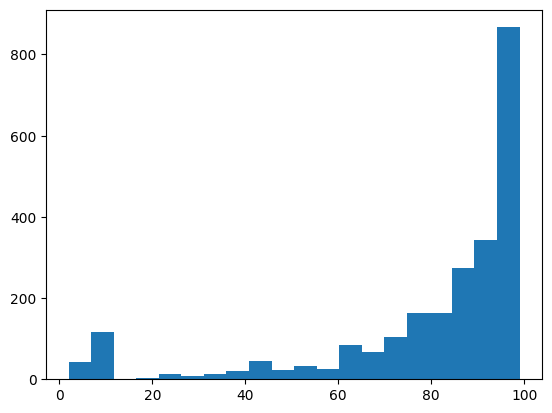

In [ ]:
plt.hist(life.loc[life['Status']=='Developing','Diphtheria'], bins=20)

GDP

In [ ]:
life.loc[(life['GDP'].isnull())]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
160,Bahamas,2015,Developing,76.1,147.0,0,10.15,0.0,95.0,0,64.5,0,95.0,7.30,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
161,Bahamas,2014,Developing,75.4,16.0,0,9.45,0.0,96.0,0,63.8,0,96.0,7.74,96.0,0.1,NaN,NaN,2.5,2.5,0.789,12.6
162,Bahamas,2013,Developing,74.8,172.0,0,9.42,0.0,97.0,0,63.2,0,97.0,7.50,97.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
163,Bahamas,2012,Developing,74.9,167.0,0,9.50,0.0,96.0,0,62.6,0,99.0,7.43,98.0,0.2,NaN,NaN,2.5,2.5,0.789,12.6
164,Bahamas,2011,Developing,75.0,162.0,0,9.34,0.0,95.0,0,62.0,0,97.0,7.63,98.0,0.1,NaN,NaN,2.5,2.5,0.788,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,Yemen,2004,Developing,62.2,247.0,42,0.06,0.0,43.0,12708,33.3,56,72.0,4.90,72.0,0.1,NaN,NaN,13.9,13.9,0.464,8.4
2902,Yemen,2003,Developing,61.9,249.0,43,0.04,0.0,38.0,8536,32.7,58,61.0,5.00,61.0,0.1,NaN,NaN,14.0,13.9,0.457,8.2
2903,Yemen,2002,Developing,61.5,25.0,45,0.07,0.0,31.0,890,32.2,61,64.0,4.22,65.0,0.1,NaN,NaN,14.0,14.0,0.450,8.0
2904,Yemen,2001,Developing,61.1,251.0,46,0.08,0.0,19.0,485,31.7,63,73.0,4.34,73.0,0.1,NaN,NaN,14.0,14.0,0.444,7.9


In [ ]:
print("Developed countries GDP Mean: ", life.loc[life['Status']=='Developed','GDP'].mean())
print("Developed countries GDP Median: ", life.loc[life['Status']=='Developed','GDP'].median())
print("Developing countries GDP Mean: ", life.loc[life['Status']=='Developing','GDP'].mean())
print("Developing countries GDP Median: ", life.loc[life['Status']=='Developing','GDP'].median())

Developed countries GDP Mean:  22053.38644622545
Developed countries GDP Median:  13560.72386
Developing countries GDP Mean:  4299.119759685743
Developing countries GDP Median:  1250.502675


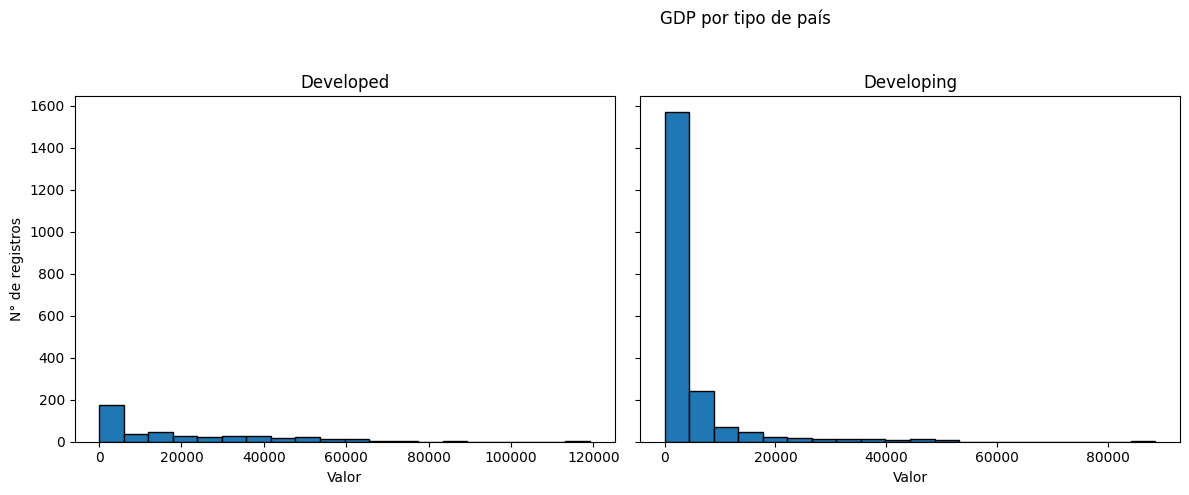

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

classes = ['Developed', 'Developing']

for i, c in enumerate(classes):
    registers = life[life['Status'] == c]['GDP'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('GDP por tipo de país')
plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

In [ ]:
countries = life.loc[(life['GDP'].isnull()), 'Country'].unique()
countriesWithAnyGDP = []
countriesWithAtLeastOneGDP = []
for country in countries:
    registers = life.loc[life['Country']==country]
    if registers['GDP'].isnull().sum() == len(registers):
        countriesWithAnyGDP.append(country)
    else:
        countriesWithAtLeastOneGDP.append(country)
print("Países sem registro de PIB: ", countriesWithAnyGDP)
print("Países com pelo menos um registro de PIB: ", countriesWithAtLeastOneGDP)

Países sem registro de PIB:  ['Bahamas', 'Bolivia (Plurinational State of)', "Côte d'Ivoire", 'Congo', 'Cook Islands', 'Czechia', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Egypt', 'Gambia', 'Iran (Islamic Republic of)', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Micronesia (Federated States of)', 'Monaco', 'Niue', 'Republic of Korea', 'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Slovakia', 'The former Yugoslav republic of Macedonia', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen']
Países com pelo menos um registro de PIB:  ['Eritrea', 'Iraq', 'Libya', 'Papua New Guinea', 'Sao Tome and Principe', 'Somalia', 'Syrian Arab Republic']


In [ ]:
data_gdp = pd.read_csv('data_gdp_per_capita.csv')

O dataset suplementar contendo o Produto Interno Bruto per capita (GDP per capita) foi obtido a partir da base de dados do Banco Mundial (World Bank, 2024). Inicialmente, foram removidas colunas não relevantes à análise, como códigos e descrições redundantes. A coluna de nome dos países foi renomeada para manter a compatibilidade com o dataset principal. Também foram excluídos registros que apresentavam ausência total de dados ou que não se referiam a países válidos. Por fim, as colunas de anos foram renomeadas para o formato numérico (ex: "2000", "2001", ..., "2015") com o objetivo de facilitar iterações programáticas e garantir consistência durante a imputação dos dados no dataset principal.
Ressalta-se que não foi possível localizar dados de PIB per capita para todos os países com valores faltantes no dataset original. Especificamente, os países Democratic People's Republic of Korea e Venezuela (Bolivarian Republic of) estavam presentes na base do Banco Mundial, mas não possuíam registros válidos para os anos de interesse. Para mitigar essa lacuna, no caso específico da Venezuela, foram utilizados dados alternativos obtidos no site Macrotrends (MACROTRENDS, 2024), que disponibiliza estimativas do PIB per capita em dólares americanos para diversos países nesse intervalo de tempo.

In [ ]:
data_gdp = data_gdp.drop(columns=['Country Code', 'Series Name', 'Series Code'], axis=1)
data_gdp = data_gdp.rename(columns={'Country Name': 'Country'})
data_gdp = data_gdp.drop(index=[33,34,35,36,37], axis=0)
for year in range(2000, 2016):
    data_gdp = data_gdp.rename(columns={f'{year} [YR{year}]': str(year)})

In [ ]:
data_gdp

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Bahamas,32443.482112,32889.104370,33393.907041,32578.144334,32462.840081,33163.959306,33561.251843,33568.741424,32350.525811,30599.022908,30675.164610,30510.311259,31111.960533,29943.283315,30229.578817,30289.402251
1,Bolivia (Plurinational State of),2014.190244,2013.845808,2029.669934,2050.071332,2099.990808,2156.186701,2221.427223,2283.427333,2383.250323,2422.575791,2481.407006,2568.520514,2657.238846,2793.514568,2900.902414,2996.012898
2,Côte d'Ivoire,1717.953857,1636.573187,1551.279259,1441.588018,1451.865471,1431.733202,1437.774538,1420.173896,1454.627318,1473.918370,1540.529273,1426.464639,1503.434330,1632.327128,1742.536930,1814.718551
3,Congo,2057.019220,2056.165059,2100.168767,2058.886837,2058.884029,2140.036862,2226.023355,2004.101040,2061.558299,2211.315724,2332.285081,2307.493844,2467.061029,2390.657549,2488.681185,2439.351894
4,Czechia,12543.936434,12958.466762,13179.987810,13618.934964,14259.633429,15147.721443,16107.304250,16892.542857,17190.647032,16272.808475,16665.931783,16926.284666,16772.353923,16759.780865,17118.042557,17931.598767
5,Democratic Republic of the Congo,327.240142,310.380267,309.911785,317.778121,329.349064,338.980981,346.179697,356.886805,367.843748,366.830227,380.578038,393.616174,407.671077,427.458520,452.339651,467.914581
6,Egypt,2458.608350,2492.034412,2498.481212,2524.804772,2574.423418,2635.703052,2761.624108,2902.065598,3052.212978,3135.096613,3233.845212,3222.376501,3220.991942,3216.378390,3235.662462,3306.981594
7,Gambia,659.911238,679.539756,640.038932,665.834222,693.563314,658.676285,636.596027,637.209306,657.675679,681.433469,701.014525,625.464360,639.139882,638.522369,611.879473,619.536364
8,Iran (Islamic Republic of),3885.301834,3917.299355,4198.953561,4511.431340,4607.451691,4650.358415,4778.793459,5084.717960,5035.940085,5023.893144,5249.061334,5321.758707,5058.646378,4916.972919,5093.203197,4952.733555
9,Kyrgyzstan,718.342906,749.423855,742.443001,786.350475,831.482185,820.709599,837.138027,900.028050,966.409971,981.220905,962.764790,1005.483269,985.847287,1069.784044,1088.582234,1105.652030


Para a variável GDP, a fim de evitar perdas de informação e garantir maior consistência histórica dos dados, foi realizada a imputação desses valores com base em dados oficiais obtidos nos sites do Banco Mundial (World Bank Open Data, 2024) e Macrotrends (MACROTRENDS, 2024). Para cada país com valores ausentes, buscou-se no banco de dados complementar os registros correspondentes aos anos entre 2000 e 2015. A substituição foi feita ano a ano, respeitando a série temporal original, garantindo, assim, uma maior fidelidade à realidade econômica de cada país analisado.

In [ ]:
countriesDeveloping = life.loc[(life['GDP'].isnull()), 'Country'].unique()
countriesDataGDP = data_gdp['Country'].unique()
for country in countriesDeveloping:
    if country in countriesDataGDP:
        countryRegisters = life.loc[(life['Country']==country) & (life['GDP'].isnull())]
        for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
            life.loc[(life['Country']==country) & (life['Year']==i), 'GDP'] = float(data_gdp.loc[data_gdp['Country']==country, str(i)].values[0])

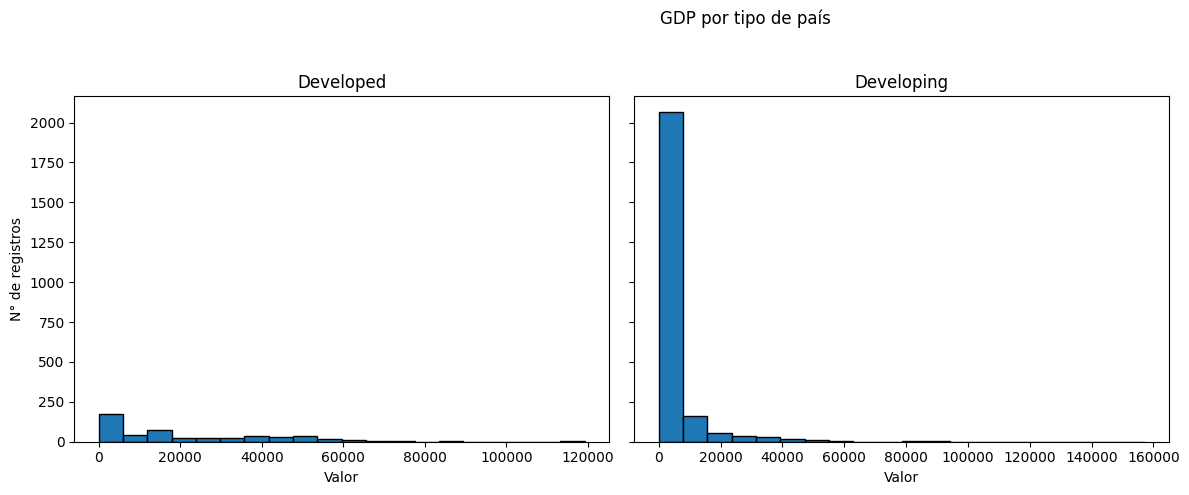

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

classes = ['Developed', 'Developing']

for i, c in enumerate(classes):
    registers = life[life['Status'] == c]['GDP'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('GDP por tipo de país')
plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

In [ ]:
life[life['GDP'].isnull()]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,71.0,155.0,0,0.01,0.0,98.0,0,82.8,0,98.0,3.580,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
705,Democratic People's Republic of Korea,2015,Developing,76.0,139.0,6,3.16,0.0,96.0,0,32.9,7,99.0,5.560,96.0,0.1,NaN,NaN,4.9,4.9,NaN,NaN
706,Democratic People's Republic of Korea,2014,Developing,73.0,142.0,6,0.01,0.0,93.0,3,32.4,8,99.0,5.640,93.0,0.1,NaN,NaN,4.9,4.9,NaN,NaN
707,Democratic People's Republic of Korea,2013,Developing,71.0,146.0,6,3.35,0.0,93.0,0,31.8,8,99.0,5.825,93.0,0.1,NaN,NaN,5.0,5.0,NaN,NaN
708,Democratic People's Republic of Korea,2012,Developing,69.8,149.0,7,3.61,0.0,96.0,0,31.3,9,99.0,5.690,96.0,0.1,NaN,NaN,5.1,5.1,NaN,NaN
709,Democratic People's Republic of Korea,2011,Developing,69.4,153.0,8,3.39,0.0,94.0,0,3.8,10,99.0,5.545,94.0,0.1,NaN,NaN,5.1,5.2,NaN,NaN
710,Democratic People's Republic of Korea,2010,Developing,69.0,157.0,8,3.12,0.0,93.0,0,3.3,10,99.0,5.375,93.0,0.1,NaN,NaN,5.2,5.2,NaN,NaN
711,Democratic People's Republic of Korea,2009,Developing,68.7,161.0,9,3.35,0.0,93.0,0,29.7,11,98.0,5.890,93.0,0.1,NaN,NaN,5.3,5.3,NaN,NaN
712,Democratic People's Republic of Korea,2008,Developing,68.6,164.0,9,3.16,0.0,92.0,8,29.2,12,98.0,5.405,92.0,0.1,NaN,NaN,5.4,5.4,NaN,NaN
713,Democratic People's Republic of Korea,2007,Developing,68.5,166.0,9,3.13,0.0,92.0,3550,28.7,12,99.0,5.130,92.0,0.1,NaN,NaN,5.5,5.5,NaN,NaN


Para os países em desenvolvimento que ainda apresentavam valores nulos na variável GDP após a busca por fontes externas, adotou-se o preenchimento com base em estatísticas disponíveis. Quando o país não possuía nenhum valor válido, os registros foram preenchidos com a mediana do GDP dos países em desenvolvimento no mesmo ano. Nos demais casos, utilizou-se a mediana do próprio país.

In [ ]:
countriesDeveloping = life.loc[(life['GDP'].isnull()) & (life['Status']=='Developing'), 'Country'].unique()
for country in countriesDeveloping:
    countryRegisters = life.loc[life['Country']==country]
    if countryRegisters['GDP'].isnull().sum() == len(countryRegisters):
        for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
            life.loc[(life['Country']==country) & (life['Year']==i), 'GDP'] = life.loc[(life['Year']==i) & (life['Status']=='Developing'), 'GDP'].median()
    else:
        for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
            life.loc[(life['Country']==country) & (life['GDP'].isnull()) & (life['Year']==i), 'GDP'] = life.loc[(life['Country']==country), 'GDP'].median()

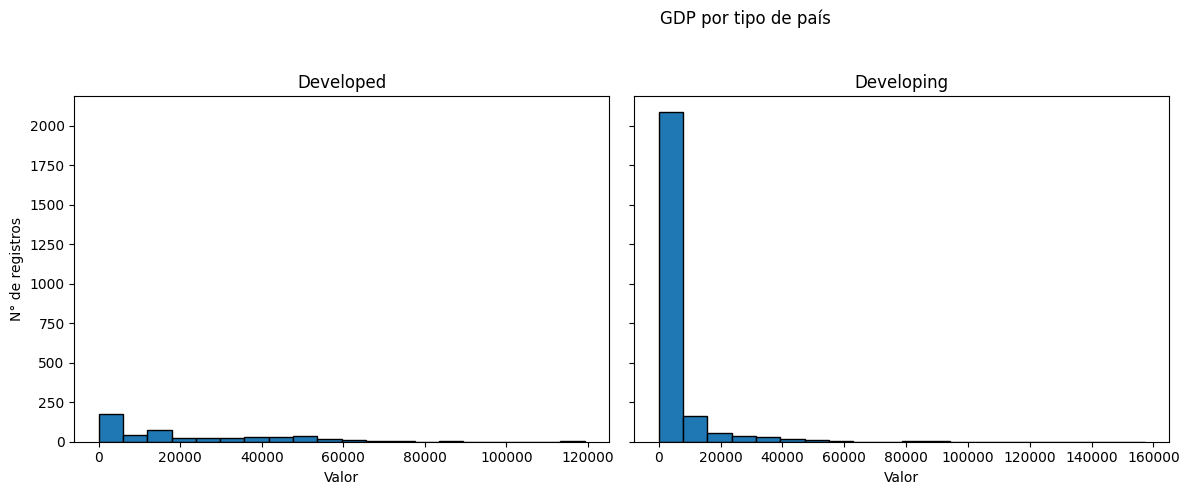

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

classes = ['Developed', 'Developing']

for i, c in enumerate(classes):
    registers = life[life['Status'] == c]['GDP'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('GDP por tipo de país')
plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

Population

In [ ]:
countryStatus = ['Developed', 'Developing']
for status in countryStatus:
    countries = life.loc[(life['Population'].isnull()) & (life['Status']==status), 'Country'].unique()
    countriesWithoutAnyPopulation = []
    countriesWithAtLeastOnePopulation = []
    for country in countries:
        registers = life.loc[(life['Country']==country)]
        if registers['Population'].isnull().sum() == len(registers):
            countriesWithoutAnyPopulation.append(country)
        else:
            countriesWithAtLeastOnePopulation.append(country)
    print(f"{status} countries without any population registers: ", countriesWithoutAnyPopulation)
    print(f"{status} countries with at least one population register: ", countriesWithAtLeastOnePopulation)

Developed countries without any population registers:  ['Czechia', 'New Zealand', 'Singapore', 'Slovakia', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America']
Developed countries with at least one population register:  []
Developing countries without any population registers:  ['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados', 'Bolivia (Plurinational State of)', 'Brunei Darussalam', "Côte d'Ivoire", 'Congo', 'Cook Islands', 'Cuba', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Dominica', 'Egypt', 'Gambia', 'Grenada', 'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Libya', 'Marshall Islands', 'Micronesia (Federated States of)', 'Monaco', 'Nauru', 'Niue', 'Oman', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia', 'Somalia', 'The former Yugoslav republic of Macedonia', '

In [ ]:
print("Developed countries Population Mean: ", life.loc[life['Status']=='Developed','Population'].mean())
print("Developed countries Population Median: ", life.loc[life['Status']=='Developed','Population'].median())
print("Developed countries Population Mode: ", life.loc[life['Status']=='Developed','Population'].mode())
print("Developing countries Population Mean: ", life.loc[life['Status']=='Developing','Population'].mean())
print("Developing countries Population Median: ", life.loc[life['Status']=='Developing','Population'].median())
print("Developing countries Population Mode: ", life.loc[life['Status']=='Developing','Population'].mode())

Developed countries Population Mean:  6830052.826923077
Developed countries Population Median:  1167660.0
Developed countries Population Mode:  0    444.0
Name: Population, dtype: float64
Developing countries Population Mean:  14160140.406925568
Developing countries Population Median:  1404827.0
Developing countries Population Mode:  0       292.0
1    718239.0
Name: Population, dtype: float64


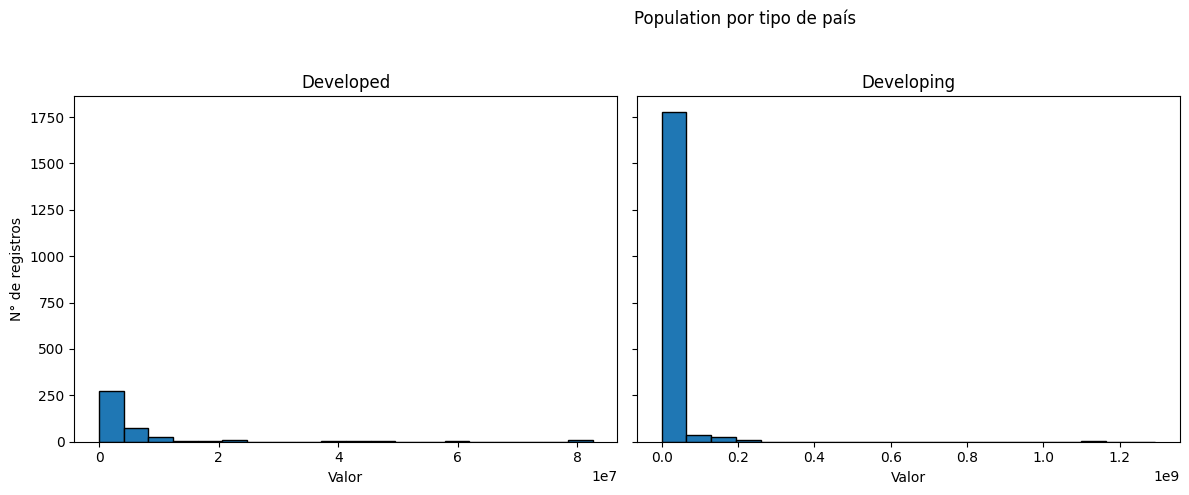

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

classes = ['Developed', 'Developing']

for i, c in enumerate(classes):
    registers = life[life['Status'] == c]['Population'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Population por tipo de país')
plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

In [ ]:
data_population = pd.read_csv('data_population.csv')

In [ ]:
data_population.head()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Antigua and Barbuda,ATG,"Population, total",SP.POP.TOTL,74912.0,76069.0,77032,77884,78719.0,79611.0,80604,81704.0,82912,84173,85320,86332.0,87260,88064,88765.0,89409.0
1,Bahamas,BHS,"Population, total",SP.POP.TOTL,323835.0,327836.0,331614,335618,339782.0,343894.0,348375,353334.0,358120,362810,367478,371729.0,375469,378953,382298.0,385346.0
2,Bahrain,BHR,"Population, total",SP.POP.TOTL,637582.0,661316.0,710553,764517,823741.0,888822.0,960424,1039295.0,1103496,1178415,1228543,1195020.0,1208964,1253191,1314562.0,1370322.0
3,Barbados,BRB,"Population, total",SP.POP.TOTL,262063.0,262425.0,264148,265776,267298.0,268706.0,270002,271288.0,272714,274123,275243,276139.0,276938,277665,278348.0,278990.0
4,Bolivia (Plurinational State of),BOL,"Population, total",SP.POP.TOTL,8606326.0,8752736.0,8900355,9050700,9204287.0,9360754.0,9521689,9685960.0,9850858,10016275,10182345,10348929.0,10515807,10682608,10848888.0,11014705.0


In [ ]:
data_population = data_population.drop(columns=['Country Code', 'Series Name', 'Series Code'], axis=1)
data_population = data_population.rename(columns={'Country Name': 'Country'})
for year in range(2000, 2016):
    data_population = data_population.rename(columns={f'{year} [YR{year}]': str(year)})

In [ ]:
data_population.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Antigua and Barbuda,74912.0,76069.0,77032,77884,78719.0,79611.0,80604,81704.0,82912,84173,85320,86332.0,87260,88064,88765.0,89409.0
1,Bahamas,323835.0,327836.0,331614,335618,339782.0,343894.0,348375,353334.0,358120,362810,367478,371729.0,375469,378953,382298.0,385346.0
2,Bahrain,637582.0,661316.0,710553,764517,823741.0,888822.0,960424,1039295.0,1103496,1178415,1228543,1195020.0,1208964,1253191,1314562.0,1370322.0
3,Barbados,262063.0,262425.0,264148,265776,267298.0,268706.0,270002,271288.0,272714,274123,275243,276139.0,276938,277665,278348.0,278990.0
4,Bolivia (Plurinational State of),8606326.0,8752736.0,8900355,9050700,9204287.0,9360754.0,9521689,9685960.0,9850858,10016275,10182345,10348929.0,10515807,10682608,10848888.0,11014705.0


In [ ]:
life.loc[life['Country']=='Eritrea']

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
850,Eritrea,2015,Developing,64.7,255.0,5,0.62,0.000000,95.0,198,18.6,7,95.0,3.30,95.0,0.4,282.090592,NaN,8.4,8.2,0.418,5.0
851,Eritrea,2014,Developing,64.4,261.0,5,0.01,0.000000,94.0,127,18.0,8,94.0,3.34,94.0,0.4,282.090592,NaN,8.5,8.3,0.416,5.0
852,Eritrea,2013,Developing,64.0,266.0,6,0.01,0.000000,94.0,45,17.5,8,94.0,3.10,94.0,0.5,282.090592,NaN,8.6,8.4,0.414,5.0
853,Eritrea,2012,Developing,63.6,274.0,6,0.01,0.000000,94.0,194,17.0,8,94.0,2.98,94.0,0.6,282.090592,NaN,8.7,8.6,0.410,5.0
854,Eritrea,2011,Developing,62.9,286.0,6,0.62,20.979919,96.0,48,16.5,8,96.0,3.60,96.0,0.7,582.775532,447469.0,8.8,8.7,0.405,5.0
855,Eritrea,2010,Developing,62.1,298.0,6,0.61,17.357398,9.0,51,16.0,9,9.0,3.24,9.0,0.9,482.149940,43984.0,8.9,8.8,0.404,5.1
856,Eritrea,2009,Developing,61.4,311.0,6,0.63,1.575160,92.0,82,15.5,9,92.0,3.30,92.0,1.0,43.754450,431334.0,9.0,8.9,0.402,5.2
857,Eritrea,2008,Developing,67.0,322.0,6,0.49,11.765723,94.0,0,15.1,9,94.0,3.69,94.0,1.1,326.825642,4232636.0,9.1,9.1,0.406,5.2
858,Eritrea,2007,Developing,62.0,329.0,6,1.23,11.423860,91.0,55,14.7,9,91.0,3.29,91.0,1.3,317.329434,4153332.0,9.2,9.2,0.405,5.3
859,Eritrea,2006,Developing,59.7,336.0,7,0.97,10.602698,94.0,128,14.3,9,94.0,3.30,94.0,1.4,297.828588,466648.0,9.3,9.3,0.405,5.3


A coluna referente à população apresentou 652 valores ausentes, todos associados a países em desenvolvimento. Para preencher essas lacunas, foi realizada uma busca por dados populacionais dos anos de 2000 a 2015, utilizando como fontes os sites The World Bank (https://data.worldbank.org/indicator/SP.POP.TOTL) e Our World in Data (https://ourworldindata.org/population). Os valores foram coletados manualmente e organizados conforme o formato do conjunto de dados original, respeitando a correspondência entre país e ano. Após a padronização dos nomes dos países, os dados foram integrados ao dataset principal, garantindo a consistência e continuidade das análises relacionadas à variável população.

In [ ]:
countriesDeveloping = life.loc[(life['Population'].isnull()), 'Country'].unique()
countriesDataPopulation = data_population['Country'].unique()
for country in countriesDeveloping:
    if country in countriesDataPopulation:
        countryRegisters = life.loc[(life['Country']==country) & (life['Population'].isnull())]
        for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
            life.loc[(life['Country']==country) & (life['Year']==i), 'Population'] = float(data_population.loc[data_population['Country']==country, str(i)].values[0])

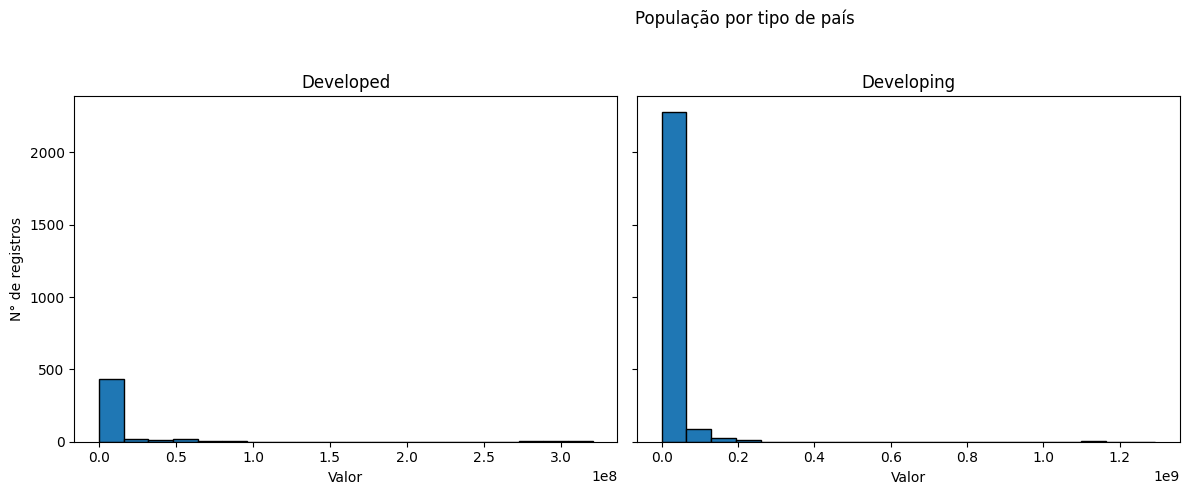

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

classes = ['Developed', 'Developing']

for i, c in enumerate(classes):
    registers = life[life['Status'] == c]['Population'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('População por tipo de país')
plt.tight_layout(rect=[0, 0, 0.8, 0.95])
plt.show()

thinness

In [ ]:
life.loc[life['thinness_1-19_years'].isnull()]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
1715,Monaco,2013,Developing,71.0,155.0,0,0.01,0.000000,99.0,0,45.0,0,99.0,4.30,99.0,0.1,157167.975028,35447.0,NaN,NaN,NaN,NaN
2216,San Marino,2013,Developing,71.0,155.0,0,0.01,0.000000,69.0,0,45.0,0,69.0,6.50,69.0,0.1,42293.487069,33041.0,NaN,NaN,NaN,15.1
2457,Sudan,2015,Developing,64.1,225.0,58,1.76,0.000000,93.0,3585,37.9,85,93.0,4.72,93.0,0.3,2513.884661,3864783.0,NaN,NaN,0.488,7.2
2458,Sudan,2014,Developing,63.8,229.0,59,0.01,253.608651,94.0,676,37.3,86,94.0,8.43,94.0,0.3,2176.898290,37737913.0,NaN,NaN,0.485,7.2
2459,Sudan,2013,Developing,63.5,232.0,60,0.01,227.835321,93.0,2813,45.0,88,93.0,8.42,93.0,0.3,1955.667990,36849918.0,NaN,NaN,0.478,7.0
2460,Sudan,2012,Developing,63.2,235.0,61,0.01,220.522192,92.0,8523,38.2,89,92.0,8.20,92.0,0.3,1892.894352,3599192.0,NaN,NaN,0.468,6.8
2461,Sudan,2011,Developing,62.7,241.0,61,2.12,196.689215,93.0,5616,36.3,91,93.0,8.30,93.0,0.3,1666.857757,35167314.0,NaN,NaN,0.463,7.0
2462,Sudan,2010,Developing,62.5,243.0,62,1.77,172.009788,75.0,680,33.5,92,9.0,7.97,9.0,0.3,1476.478870,34385963.0,NaN,NaN,0.461,7.0
2463,Sudan,2009,Developing,62.0,248.0,63,1.99,17.053693,72.0,68,35.9,94,81.0,8.40,81.0,0.3,1226.884381,3365619.0,NaN,NaN,0.456,6.8
2464,Sudan,2008,Developing,61.8,251.0,64,2.01,128.636271,78.0,129,32.4,95,85.0,8.17,86.0,0.3,1291.528826,32955496.0,NaN,NaN,0.444,6.3


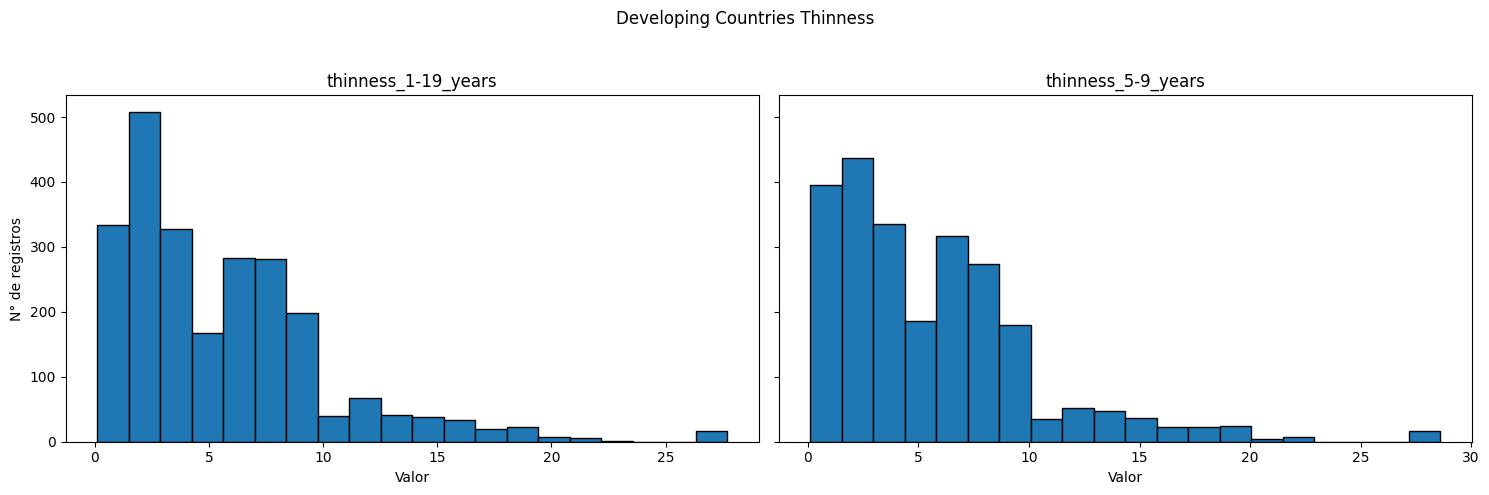

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

columns = ['thinness_1-19_years', 'thinness_5-9_years']

for i, c in enumerate(columns):
    registers = life[life['Status']=='Developing'][c].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Developing Countries Thinness')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
print("Developing countries thinness_1-19_years Mean: ", life.loc[life['Status']=='Developing','thinness_1-19_years'].mean())
print("Developing countries thinness_1-19_years Median: ", life.loc[life['Status']=='Developing','thinness_1-19_years'].median())
print("Developing countries thinness_1-19_years Mode: ", life.loc[life['Status']=='Developing','thinness_1-19_years'].mode())

Developing countries thinness_1-19_years Mean:  5.592934782608696
Developing countries thinness_1-19_years Median:  4.5
Developing countries thinness_1-19_years Mode:  0    1.5
Name: thinness_1-19_years, dtype: float64


In [ ]:
print("Developing countries thinness_5-9_years Mean: ", life.loc[life['Status']=='Developing','thinness_5-9_years'].mean())
print("Developing countries thinness_5-9_years Median: ", life.loc[life['Status']=='Developing','thinness_5-9_years'].median())
print("Developing countries thinness_5-9_years Mode: ", life.loc[life['Status']=='Developing','thinness_5-9_years'].mode())

Developing countries thinness_5-9_years Mean:  5.635242474916388
Developing countries thinness_5-9_years Median:  4.6
Developing countries thinness_5-9_years Mode:  0    1.1
Name: thinness_5-9_years, dtype: float64


As colunas thinness_1-19_years e thinness_5-9_years apresentaram valores ausentes exclusivamente em países em desenvolvimento, sendo que os mesmos países não possuíam registros em ambas as colunas. Para os países que não possuíam nenhum valor registrado ao longo dos anos, os dados foram preenchidos com a mediana anual de todos os países para aquele ano. Já nos casos em que apenas parte dos dados estavam ausentes, utilizou-se a mediana do próprio país, considerando os valores disponíveis.

In [ ]:
columns = ['thinness_1-19_years', 'thinness_5-9_years']
for column in columns:
    countriesDeveloping = life.loc[life[column].isnull(), 'Country'].unique()
    for country in countriesDeveloping:
        countryRegisters = life.loc[life['Country']==country]
        if countryRegisters[column].isnull().sum() == len(countryRegisters):
            for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
                life.loc[(life['Country']==country) & (life['Year']==i), column] = life.loc[life['Year']==i, column].median()
        else:
            for i in range(countryRegisters['Year'].min(), countryRegisters['Year'].max() + 1):
                life.loc[(life['Country']==country) & (life[column].isnull()) & (life['Year']==i), column] = life.loc[(life['Country']==country), column].median()

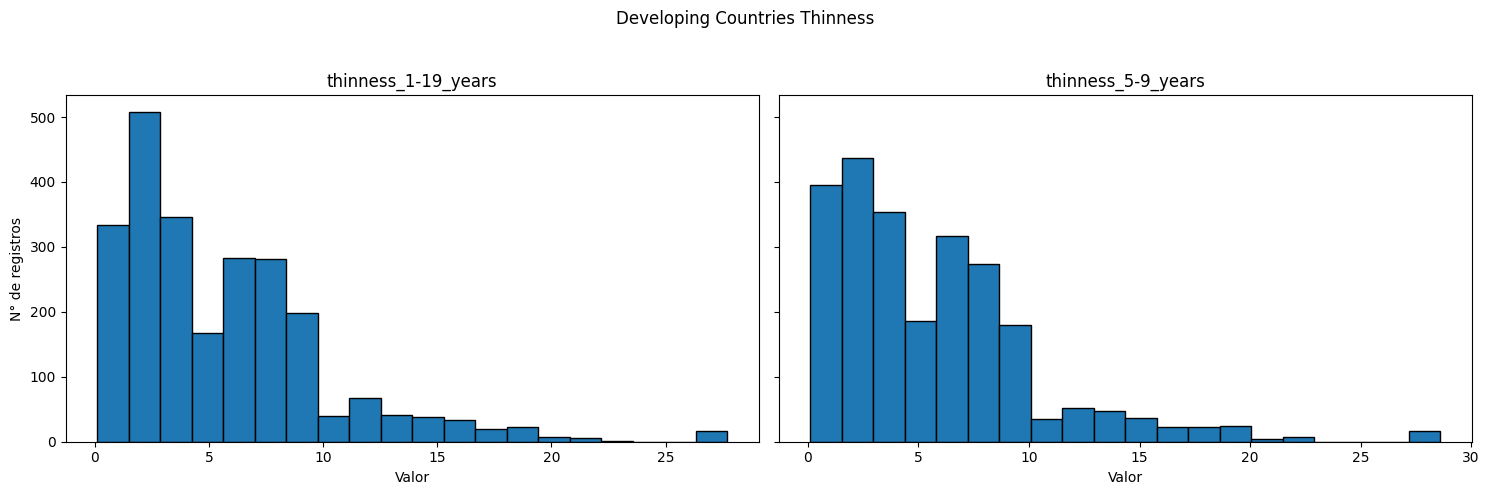

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

columns = ['thinness_1-19_years', 'thinness_5-9_years']

for i, c in enumerate(columns):
    registers = life[life['Status']=='Developing'][c].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Developing Countries Thinness')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Income composition of resources

In [ ]:
life.loc[life['Income_composition_of_resources'].isnull()]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,3.12,0.0,83.0,65,28.0,79,81.0,5.87,83.0,1.9,1814.718551,25246342.0,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,27.4,80,76.0,5.72,76.0,2.0,1742.536930,24527395.0,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,26.8,81,79.0,5.81,8.0,2.4,1632.327128,23939775.0,5.8,5.7,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,26.2,82,83.0,6.14,82.0,2.9,1503.434330,23467078.0,5.9,5.9,NaN,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,25.6,83,58.0,6.42,62.0,3.3,1426.464639,22982000.0,6.1,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.0,92.0,37,63.1,33,92.0,15.14,96.0,0.1,51348.347338,292805298.0,0.7,0.6,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.0,92.0,56,62.4,33,91.0,15.60,96.0,0.1,49905.523307,290107933.0,0.7,0.6,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.0,88.0,41,61.7,33,9.0,14.55,94.0,0.1,48967.366120,287625193.0,0.8,0.6,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.0,89.0,116,6.9,33,89.0,13.73,94.0,0.1,48597.424614,284968955.0,0.8,0.6,NaN,NaN


In [ ]:
print("Developed countries Income_composition_of_resources Mean: ", life.loc[life['Status']=='Developed','Income_composition_of_resources'].mean())
print("Developed countries Income_composition_of_resources Median: ", life.loc[life['Status']=='Developed','Income_composition_of_resources'].median())
print("Developed countries Income_composition_of_resources Mode: ", life.loc[life['Status']=='Developed','Income_composition_of_resources'].mode())
print("Developing countries Income_composition_of_resources Mean: ", life.loc[life['Status']=='Developing','Income_composition_of_resources'].mean())
print("Developing countries Income_composition_of_resources Median: ", life.loc[life['Status']=='Developing','Income_composition_of_resources'].median())
print("Developing countries Income_composition_of_resources Mode: ", life.loc[life['Status']=='Developing','Income_composition_of_resources'].mode())

Developed countries Income_composition_of_resources Mean:  0.852489224137931
Developed countries Income_composition_of_resources Median:  0.862
Developed countries Income_composition_of_resources Mode:  0    0.873
1    0.877
2    0.892
Name: Income_composition_of_resources, dtype: float64
Developing countries Income_composition_of_resources Mean:  0.585457005674378
Developing countries Income_composition_of_resources Median:  0.633
Developing countries Income_composition_of_resources Mode:  0    0.0
Name: Income_composition_of_resources, dtype: float64


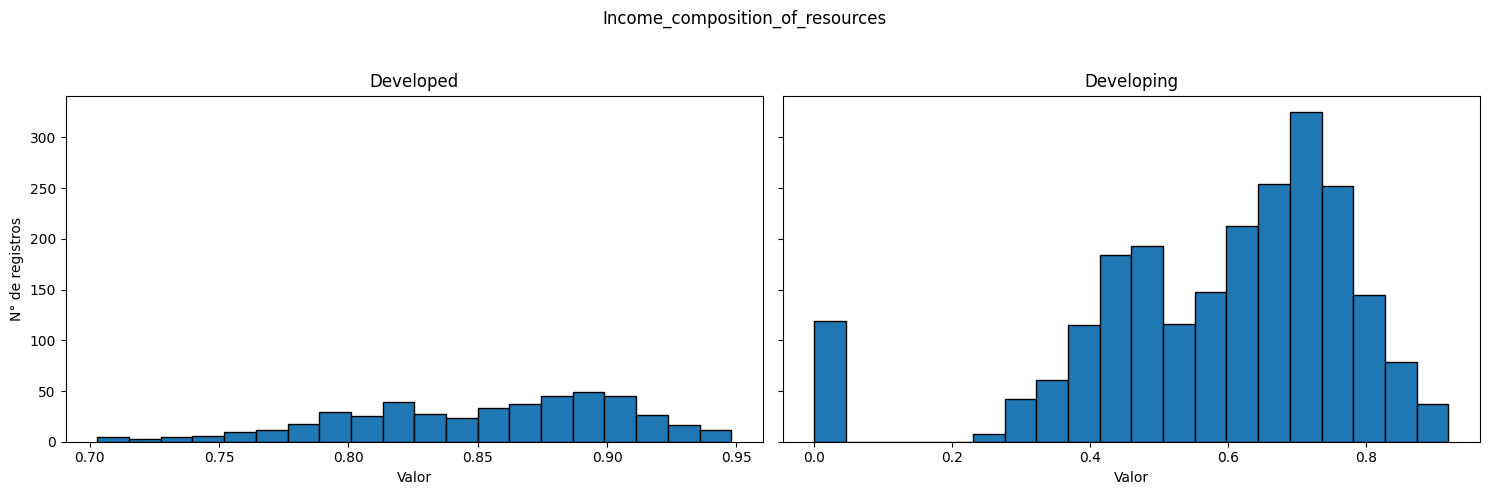

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

status = ['Developed', 'Developing']

for i, c in enumerate(status):
    registers = life[life['Status']==c]['Income_composition_of_resources'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Income_composition_of_resources')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Os valores ausentes da coluna Income composition of resources foram tratados com base no status de desenvolvimento dos países. Como todos os países com dados ausentes não apresentavam registros em nenhum dos anos (2000 a 2015), optou-se por utilizar a mediana dos valores disponíveis para países com o mesmo status socioeconômico.

In [ ]:
for status in ['Developed', 'Developing']:
    life.loc[(life['Income_composition_of_resources'].isnull()) & (life['Status']==status), 'Income_composition_of_resources'] = life.loc[life['Status']==status, 'Income_composition_of_resources'].median()

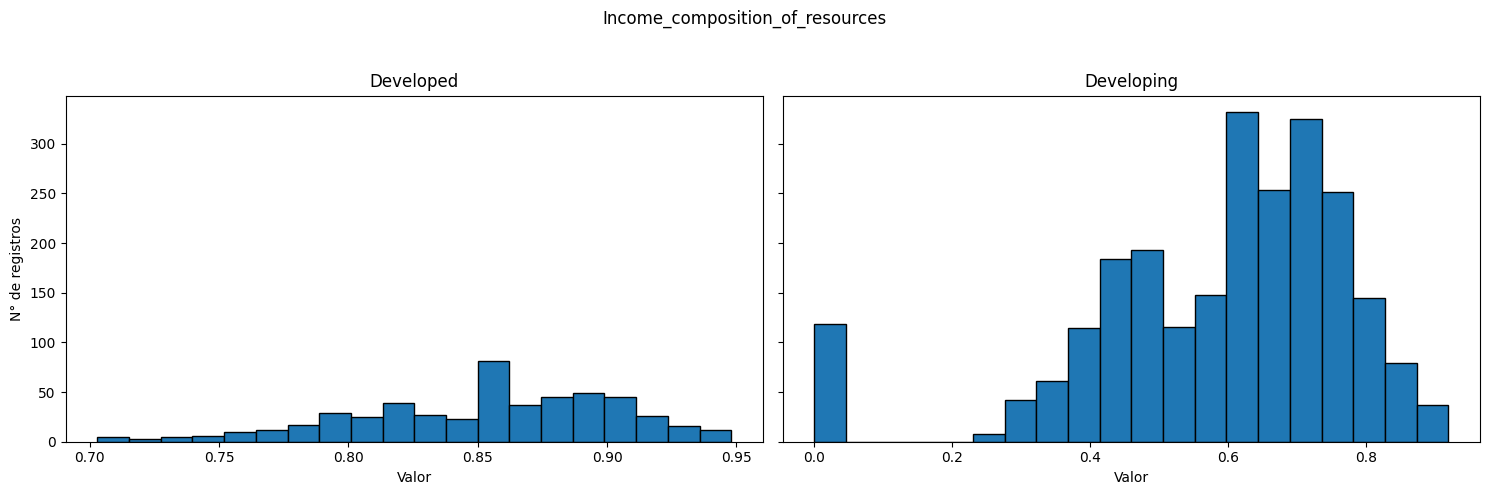

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

status = ['Developed', 'Developing']

for i, c in enumerate(status):
    registers = life[life['Status']==c]['Income_composition_of_resources'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Income_composition_of_resources')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Schooling

In [ ]:
life.loc[life['Schooling'].isnull()]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,3.12,0.0,83.0,65,28.0,79,81.0,5.87,83.0,1.9,1814.718551,25246342.0,5.5,5.5,0.633,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,27.4,80,76.0,5.72,76.0,2.0,1742.536930,24527395.0,5.6,5.6,0.633,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,26.8,81,79.0,5.81,8.0,2.4,1632.327128,23939775.0,5.8,5.7,0.633,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,26.2,82,83.0,6.14,82.0,2.9,1503.434330,23467078.0,5.9,5.9,0.633,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,25.6,83,58.0,6.42,62.0,3.3,1426.464639,22982000.0,6.1,6.0,0.633,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.0,92.0,37,63.1,33,92.0,15.14,96.0,0.1,51348.347338,292805298.0,0.7,0.6,0.862,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.0,92.0,56,62.4,33,91.0,15.60,96.0,0.1,49905.523307,290107933.0,0.7,0.6,0.862,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.0,88.0,41,61.7,33,9.0,14.55,94.0,0.1,48967.366120,287625193.0,0.8,0.6,0.862,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.0,89.0,116,6.9,33,89.0,13.73,94.0,0.1,48597.424614,284968955.0,0.8,0.6,0.862,NaN


In [ ]:
print("Developed countries Schooling Mean: ", life.loc[life['Status']=='Developed','Schooling'].mean())
print("Developed countries Schooling Median: ", life.loc[life['Status']=='Developed','Schooling'].median())
print("Developed countries Schooling Mode: ", life.loc[life['Status']=='Developed','Schooling'].mode())
print("Developing countries Schooling Mean: ", life.loc[life['Status']=='Developing','Schooling'].mean())
print("Developing countries Schooling Median: ", life.loc[life['Status']=='Developing','Schooling'].median())
print("Developing countries Schooling Mode: ", life.loc[life['Status']=='Developing','Schooling'].mode())

Developed countries Schooling Mean:  15.845474137931033
Developed countries Schooling Median:  15.8
Developed countries Schooling Mode:  0    15.3
1    15.4
2    15.8
Name: Schooling, dtype: float64
Developing countries Schooling Mean:  11.286797385620913
Developing countries Schooling Median:  11.7
Developing countries Schooling Mode:  0    12.9
Name: Schooling, dtype: float64


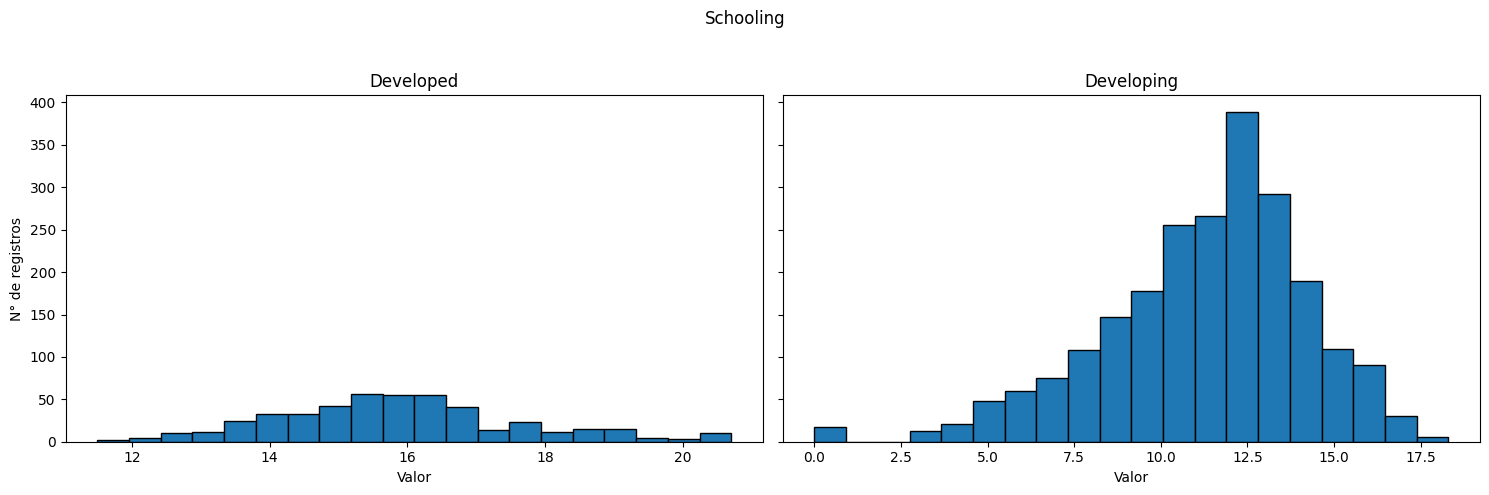

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

status = ['Developed', 'Developing']

for i, c in enumerate(status):
    registers = life[life['Status']==c]['Schooling'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Schooling')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Para o preenchimento dos valores ausentes na coluna Schooling foi utilizada a média dos países com o mesmo status socioeconômico (desenvolvido ou em desenvolvimento). A decisão foi baseada na análise gráfica da distribuição dos dados, que apresentou um formato semelhante ao de uma distribuição normal. A média utilizada foi de 15.85 anos para países desenvolvidos e 11.29 anos para países em desenvolvimento.

In [ ]:
for status in ['Developed', 'Developing']:
    life.loc[(life['Schooling'].isnull()) & (life['Status']==status), 'Schooling'] = life.loc[life['Status']==status, 'Schooling'].mean()

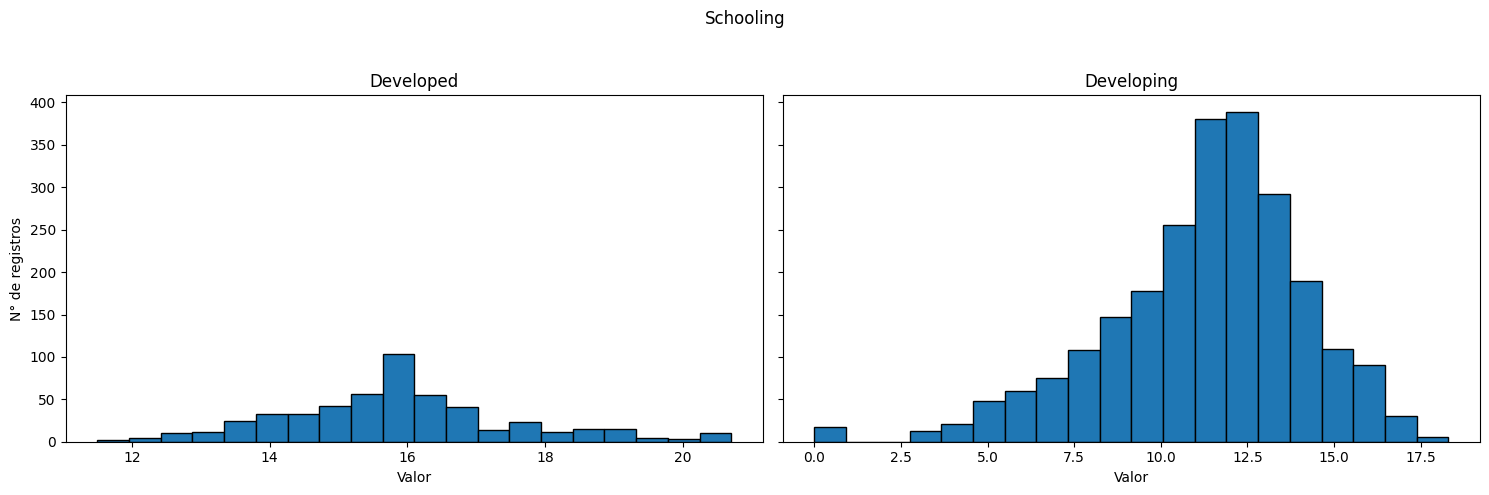

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

status = ['Developed', 'Developing']

for i, c in enumerate(status):
    registers = life[life['Status']==c]['Schooling'].dropna()
    axs[i].hist(registers, bins=20, edgecolor='black')
    axs[i].set_title(c)
    axs[i].set_xlabel('Valor')
    if i == 0:
        axs[i].set_ylabel('N° de registros')

fig.suptitle('Schooling')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
life.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2922 non-null   object 
 1   Year                             2922 non-null   int64  
 2   Status                           2922 non-null   object 
 3   Life_expectancy                  2922 non-null   float64
 4   Adult_Mortality                  2922 non-null   float64
 5   infant_deaths                    2922 non-null   int64  
 6   Alcohol                          2922 non-null   float64
 7   percentage_expenditure           2922 non-null   float64
 8   Hepatitis_B                      2922 non-null   float64
 9   Measles                          2922 non-null   int64  
 10  BMI                              2922 non-null   float64
 11  under-five_deaths                2922 non-null   int64  
 12  Polio                    

Como a coluna Country contém apenas identificadores nominais dos países e não contribui diretamente para a análise estatística ou modelagem preditiva, ela foi removida do conjunto de dados para evitar introdução de variáveis categóricas com alta cardinalidade, o que poderia afetar negativamente o desempenho de algoritmos de machine learning.

In [ ]:
life = life.drop(['Country'], axis=1)

A coluna Status, originalmente categórica do tipo nominal, indica se um país é "Developed" ou "Developing". Por se tratar de uma variável sem ordem intrínseca entre suas categorias, foi necessário transformá-la em uma variável numérica para viabilizar sua utilização em algoritmos de aprendizado de máquina, que operam com dados numéricos. Essa transformação consistiu na aplicação de um processo de label encoding, convertendo Developed para o valor 1 e Developing para o valor 0. Com isso, a variável pode ser usada como entrada em modelos de machine learning sem distorcer relações entre categorias.

In [ ]:
life['Status'] = life['Status'].map({'Developed': 1, 'Developing': 0})

In [ ]:
life

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<Axes: ylabel='Density'>

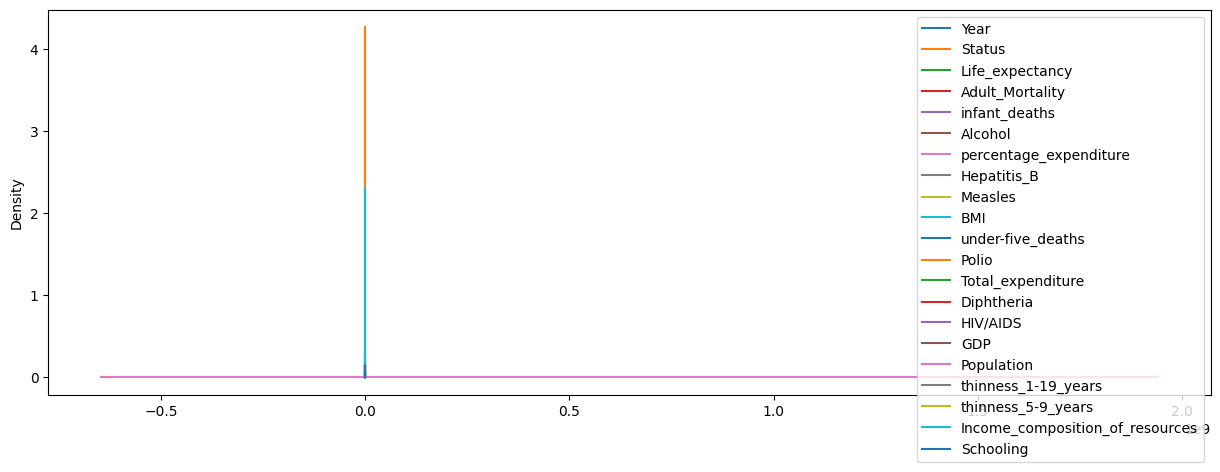

In [ ]:
life.plot.density(figsize=(15, 5))

Após o tratamento dos dados ausentes e a codificação das variáveis categóricas, foi realizada a normalização das variáveis numéricas contínuas com o objetivo de adequar os dados às exigências dos algoritmos de aprendizado de máquina. A normalização é uma etapa fundamental para evitar que atributos com escalas diferentes influenciem desproporcionalmente os resultados, especialmente em modelos sensíveis à magnitude das variáveis, como redes neurais artificiais, regressão linear e métodos baseados em distância, como o KNN. Todas as colunas numéricas foram normalizadas, exceto a coluna Status, que representa uma variável categórica binária já codificada como 0 (país em desenvolvimento) ou 1 (país desenvolvido). Esta foi mantida inalterada para preservar seu caráter informativo e evitar distorções semânticas.

In [ ]:
features = life.drop(['Status'], axis=1)
scaled_array = scaler.fit_transform(features)
life_scaled = pd.DataFrame(scaled_array, columns=features.columns, index=life.index)
life_scaled['Status'] = life['Status']

<Axes: ylabel='Density'>

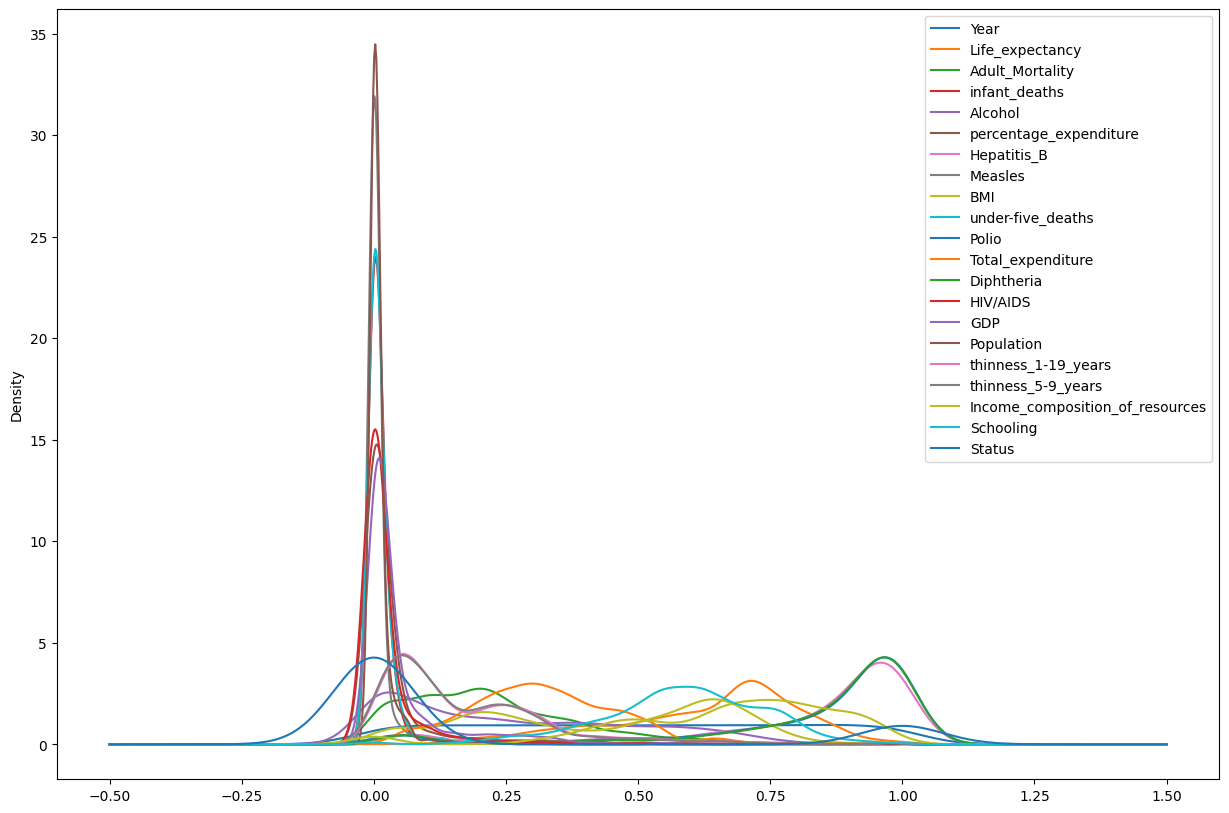

In [ ]:
life_scaled.plot.density(figsize=(15, 10))

Teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
X = life_scaled.drop(['Status'], axis=1).values
Y = life_scaled['Status'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
scaler.fit(X_train) # Treinar o scaler com os dados de treinamento e depois transforma com treino e teste
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test, pred_knn)
accuracy_knn

0.9709401709401709

In [ ]:
accuracys = []
for i in range(1, 20):
    media = 0
    for k in range(10):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)
        media += accuracy_score(Y_test, Y_pred)
    print(f'{i}: {media}')
    accuracys.append(media/10)

1: 9.709401709401709
2: 9.47008547008547
3: 9.538461538461538
4: 9.452991452991453
5: 9.435897435897436
6: 9.418803418803419
7: 9.452991452991453
8: 9.384615384615385
9: 9.384615384615385
10: 9.367521367521368
11: 9.367521367521368
12: 9.401709401709402
13: 9.2991452991453
14: 9.316239316239317
15: 9.2991452991453
16: 9.282051282051283
17: 9.213675213675215
18: 9.230769230769232
19: 9.213675213675215


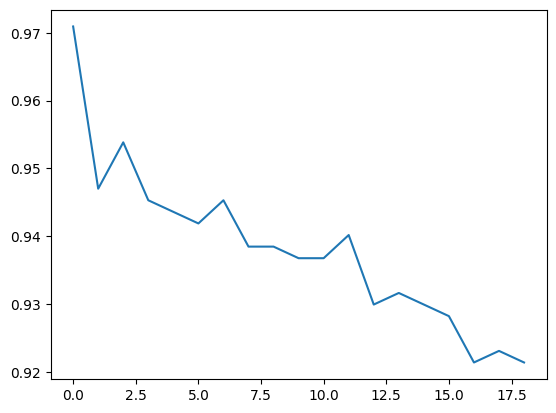

In [ ]:
plt.plot(range(0,19), accuracys)

In [ ]:
life_scaled.to_csv('life_expectancy_processed.csv', index=False)